# Continuous distribution of entanglement in _infinite_ networks with a regular topology

This notebook contains the code to create the figures for _infinite_ quantum networks (i.e., no boundaries) as shown in _Continuously Distributing Entanglement in Quantum Networks with Regular Topologies_ (2024). In particular, it contains

1. Performance metrics in infinite networks for varying cutoff times and entanglement generation fidelity
2. Performance metrics in infinite square-lattice networks for varying probabilistic generation success and probabilistic swap success
3. Performance metrics in infinite square-lattice networks for varying cutoff times and entanglement generation fidelity different than in Section 1
4. Performance metrics convergence to a steady state
5. The same performance metrics for all nodes
6. Reproducibility of data

The first three sections present the performance metrics (the virtual neighborhood size $v_i$ and virtual node degree $k_i$) as a function of the swap probability $q$ for various network parameters. In these sections, The procedure for producing each figure is as follows: (_i_) load data, (_ii_) verify the existence of a steady state of the performance metrics, and (_iii_) produce the figure.

For each seperate network parameter and topology, we load the data from the `data_<topology>_<parameter>.npy` file from the`\data` folder. The data can be (re)generated using the `data_gen_<topology>_<parameter>.py` scripts from `\data_generation`. These data generation scripts internally call the `data_gen_<topology>_<parameter>_run_sim.py` scripts that run $N$ network simulations using the `skeleton_<topology>.py` from `\simulation` and do the post-processing of the network samples for each combination of a specific value of $q$ and a specific value of a network parameter. 

The data contains (_a_) the sample means of the performance metrics at the final time step ($\bar{v}_{i, N}(t_{M-1})$ and $\bar{k}_{i, N}(t_{M-1})$), (_b_) the sample standard error of the mean performance metrics at the final time step ($\sigma_{\bar{v}_{i, N}(t_{M-1})}/\sqrt{N}$ and $\sigma_{\bar{v}_{i, N}(t_{M-1})}/\sqrt{N}$, where $\sigma_{\bar{v}_{i, N}(t_{M-1})}$ and $\sigma_{\bar{k}_{i, N}(t_{M-1})}$ are the sample standard deviations), (_c_) the error ($\varepsilon=(b-a)/\sqrt{N}$) for both the virtual neighborhood size and the virtual node degree, and (_d_) the maximum absolute difference between two averaged-performance metrics at different times during the steady-state window ($|\bar{X}_N(t_i)-\bar{X}_N(t_j)|\, \forall i,j \in W$, $i\neq j$). For details on these parameters, see Appendix B of _Continuously Distributing Entanglement in Quantum Networks with Regular Topologies_ (2024). 

Subsequently, In step (_ii_), we use Algorithm 2 from the Appendix B of _Continuously Distributing Entanglement in Quantum Networks with Regular Topologies_ (2024) with $\varepsilon'=3\varepsilon$ and the maximum difference between two averaged-performance metrics at different times during the steady-state window to determine if the performance metrics have attained their steady state values (abort if $\Delta_{ij}=2\varepsilon'-|\bar{X}_N(t_i)-\bar{X}_N(t_j)|<3\varepsilon'/2$, or, equivalently, $\varepsilon'/2=3\varepsilon/2<|\bar{X}_N(t_i)-\bar{X}_N(t_j)|$, $\forall i,j \in W$, $i\neq j$). If so, the performance metrics data is qualified to be used, and we generate the figures. We generate figures in a standard style using the `figure.MPLSTYLE` file.

The last three sections focus more on the implementation of retrieving the performance metrics. In particular, the fourth section shows how the performance metrics converge to their steady state.  Furthermore, in infinite networks, we present the performance metrics of one node as it is representative for all nodes perform -- we motivate this choice in the fifth section. Lastly, we verify that we can reproduce the data in Section 6. (The last two sections are additional information to the manuscript.)  

## 1. Performance metrics in infinite networks for varying cutoff times and entanglement generation fidelity

In [1]:
import numpy as np
number_of_samples = 10000

prob_swap_sweep_size = 101
prob_swap_range = np.arange(1, prob_swap_sweep_size)/(prob_swap_sweep_size-1)

max_swap_dist_range = [3, 1, 0]
time_cutoff = 11

time_cutoff_range = [22, 11, 2]
max_swap_dist = 2

In [2]:
# Import, reshape and rename data
data_inf_chain_time_cutoff = np.load('data/data_inf_chain_time_cutoff.npy')
data_inf_chain_max_swap_dist = np.load('data/data_inf_chain_max_swap_dist.npy')
data_inf_honeycomb_time_cutoff = np.load('data/data_inf_honeycomb_time_cutoff.npy')
data_inf_honeycomb_max_swap_dist = np.load('data/data_inf_honeycomb_max_swap_dist.npy')
data_inf_sq_time_cutoff = np.load('data/data_inf_sq_time_cutoff.npy')
data_inf_sq_max_swap_dist = np.load('data/data_inf_sq_max_swap_dist.npy') 
data_inf_tri_time_cutoff = np.load('data/data_inf_tri_time_cutoff.npy') 
data_inf_tri_max_swap_dist = np.load('data/data_inf_tri_max_swap_dist.npy') 

data_inf_chain_time_cutoff = np.reshape(data_inf_chain_time_cutoff, (len(time_cutoff_range), len(prob_swap_range), 8))
data_inf_chain_max_swap_dist = np.reshape(data_inf_chain_max_swap_dist, (len(max_swap_dist_range), len(prob_swap_range), 8))
data_inf_honeycomb_time_cutoff = np.reshape(data_inf_honeycomb_time_cutoff, (len(time_cutoff_range), len(prob_swap_range), 8))
data_inf_honeycomb_max_swap_dist = np.reshape(data_inf_honeycomb_max_swap_dist, (len(max_swap_dist_range), len(prob_swap_range), 8))
data_inf_sq_time_cutoff = np.reshape(data_inf_sq_time_cutoff, (len(time_cutoff_range), len(prob_swap_range), 8))
data_inf_sq_max_swap_dist = np.reshape(data_inf_sq_max_swap_dist, (len(max_swap_dist_range), len(prob_swap_range), 8))
data_inf_tri_time_cutoff = np.reshape(data_inf_tri_time_cutoff, (len(time_cutoff_range), len(prob_swap_range), 8))
data_inf_tri_max_swap_dist = np.reshape(data_inf_tri_max_swap_dist, (len(max_swap_dist_range), len(prob_swap_range), 8))

#  Cutoff time
###################################################################################
virt_nbhd_size_mean_inf_chain_time_cutoff = data_inf_chain_time_cutoff[:, :, 0]
virt_nbhd_size_std_error_inf_chain_time_cutoff = data_inf_chain_time_cutoff[:, :, 1]
virt_nbhd_size_error_inf_chain_time_cutoff = data_inf_chain_time_cutoff[:, :, 2]
virt_nbhd_size_max_diff_inf_chain_time_cutoff = data_inf_chain_time_cutoff[:, :, 3]

virt_node_deg_mean_inf_chain_time_cutoff = data_inf_chain_time_cutoff[:, :, 4]
virt_node_deg_std_error_inf_chain_time_cutoff = data_inf_chain_time_cutoff[:, :, 5]
virt_node_deg_error_inf_chain_time_cutoff = data_inf_chain_time_cutoff[:, :, 6]
virt_node_deg_max_diff_inf_chain_time_cutoff = data_inf_chain_time_cutoff[:, :, 7]

###################################################################################
virt_nbhd_size_mean_inf_honeycomb_time_cutoff = data_inf_honeycomb_time_cutoff[:, :, 0]
virt_nbhd_size_std_error_inf_honeycomb_time_cutoff = data_inf_honeycomb_time_cutoff[:, :, 1]
virt_nbhd_size_error_inf_honeycomb_time_cutoff = data_inf_honeycomb_time_cutoff[:, :, 2]
virt_nbhd_size_max_diff_inf_honeycomb_time_cutoff = data_inf_honeycomb_time_cutoff[:, :, 3]

virt_node_deg_mean_inf_honeycomb_time_cutoff = data_inf_honeycomb_time_cutoff[:, :, 4]
virt_node_deg_std_error_inf_honeycomb_time_cutoff = data_inf_honeycomb_time_cutoff[:, :, 5]
virt_node_deg_error_inf_honeycomb_time_cutoff = data_inf_honeycomb_time_cutoff[:, :, 6]
virt_node_deg_max_diff_inf_honeycomb_time_cutoff = data_inf_honeycomb_time_cutoff[:, :, 7]

###################################################################################
virt_nbhd_size_mean_inf_sq_time_cutoff = data_inf_sq_time_cutoff[:, :, 0]
virt_nbhd_size_std_error_inf_sq_time_cutoff = data_inf_sq_time_cutoff[:, :, 1]
virt_nbhd_size_error_inf_sq_time_cutoff = data_inf_sq_time_cutoff[:, :, 2]
virt_nbhd_size_max_diff_inf_sq_time_cutoff = data_inf_sq_time_cutoff[:, :, 3]

virt_node_deg_mean_inf_sq_time_cutoff = data_inf_sq_time_cutoff[:, :, 4]
virt_node_deg_std_error_inf_sq_time_cutoff = data_inf_sq_time_cutoff[:, :, 5]
virt_node_deg_error_inf_sq_time_cutoff = data_inf_sq_time_cutoff[:, :, 6]
virt_node_deg_max_diff_inf_sq_time_cutoff = data_inf_sq_time_cutoff[:, :, 7]

###################################################################################
virt_nbhd_size_mean_inf_tri_time_cutoff = data_inf_tri_time_cutoff[:, :, 0]
virt_nbhd_size_std_error_inf_tri_time_cutoff = data_inf_tri_time_cutoff[:, :, 1]
virt_nbhd_size_error_inf_tri_time_cutoff = data_inf_tri_time_cutoff[:, :, 2]
virt_nbhd_size_max_diff_inf_tri_time_cutoff = data_inf_tri_time_cutoff[:, :, 3]

virt_node_deg_mean_inf_tri_time_cutoff = data_inf_tri_time_cutoff[:, :, 4]
virt_node_deg_std_error_inf_tri_time_cutoff = data_inf_tri_time_cutoff[:, :, 5]
virt_node_deg_error_inf_tri_time_cutoff = data_inf_tri_time_cutoff[:, :, 6]
virt_node_deg_max_diff_inf_tri_time_cutoff = data_inf_tri_time_cutoff[:, :, 7]


#  Maximum swap distance
###################################################################################
virt_nbhd_size_mean_inf_chain_max_swap_dist = data_inf_chain_max_swap_dist[:, :, 0]
virt_nbhd_size_std_error_inf_chain_max_swap_dist = data_inf_chain_max_swap_dist[:, :, 1]
virt_nbhd_size_error_inf_chain_max_swap_dist = data_inf_chain_max_swap_dist[:, :, 2]
virt_nbhd_size_max_diff_inf_chain_max_swap_dist = data_inf_chain_max_swap_dist[:, :, 3]

virt_node_deg_mean_inf_chain_max_swap_dist = data_inf_chain_max_swap_dist[:, :, 4]
virt_node_deg_std_error_inf_chain_max_swap_dist = data_inf_chain_max_swap_dist[:, :, 5]
virt_node_deg_error_inf_chain_max_swap_dist = data_inf_chain_max_swap_dist[:, :, 6]
virt_node_deg_max_diff_inf_chain_max_swap_dist = data_inf_chain_max_swap_dist[:, :, 7]

###################################################################################
virt_nbhd_size_mean_inf_honeycomb_max_swap_dist = data_inf_honeycomb_max_swap_dist[:, :, 0]
virt_nbhd_size_std_error_inf_honeycomb_max_swap_dist = data_inf_honeycomb_max_swap_dist[:, :, 1]
virt_nbhd_size_error_inf_honeycomb_max_swap_dist = data_inf_honeycomb_max_swap_dist[:, :, 2]
virt_nbhd_size_max_diff_inf_honeycomb_max_swap_dist = data_inf_honeycomb_max_swap_dist[:, :, 3]

virt_node_deg_mean_inf_honeycomb_max_swap_dist = data_inf_honeycomb_max_swap_dist[:, :, 4]
virt_node_deg_std_error_inf_honeycomb_max_swap_dist = data_inf_honeycomb_max_swap_dist[:, :, 5]
virt_node_deg_error_inf_honeycomb_max_swap_dist = data_inf_honeycomb_max_swap_dist[:, :, 6]
virt_node_deg_max_diff_inf_honeycomb_max_swap_dist = data_inf_honeycomb_max_swap_dist[:, :, 7]

###################################################################################
virt_nbhd_size_mean_inf_sq_max_swap_dist = data_inf_sq_max_swap_dist[:, :, 0]
virt_nbhd_size_std_error_inf_sq_max_swap_dist = data_inf_sq_max_swap_dist[:, :, 1]
virt_nbhd_size_error_inf_sq_max_swap_dist = data_inf_sq_max_swap_dist[:, :, 2]
virt_nbhd_size_max_diff_inf_sq_max_swap_dist = data_inf_sq_max_swap_dist[:, :, 3]

virt_node_deg_mean_inf_sq_max_swap_dist = data_inf_sq_max_swap_dist[:, :, 4]
virt_node_deg_std_error_inf_sq_max_swap_dist = data_inf_sq_max_swap_dist[:, :, 5]
virt_node_deg_error_inf_sq_max_swap_dist = data_inf_sq_max_swap_dist[:, :, 6]
virt_node_deg_max_diff_inf_sq_max_swap_dist = data_inf_sq_max_swap_dist[:, :, 7]

###################################################################################
virt_nbhd_size_mean_inf_tri_max_swap_dist = data_inf_tri_max_swap_dist[:, :, 0]
virt_nbhd_size_std_error_inf_tri_max_swap_dist = data_inf_tri_max_swap_dist[:, :, 1]
virt_nbhd_size_error_inf_tri_max_swap_dist = data_inf_tri_max_swap_dist[:, :, 2]
virt_nbhd_size_max_diff_inf_tri_max_swap_dist = data_inf_tri_max_swap_dist[:, :, 3]

virt_node_deg_mean_inf_tri_max_swap_dist = data_inf_tri_max_swap_dist[:, :, 4]
virt_node_deg_std_error_inf_tri_max_swap_dist = data_inf_tri_max_swap_dist[:, :, 5]
virt_node_deg_error_inf_tri_max_swap_dist = data_inf_tri_max_swap_dist[:, :, 6]
virt_node_deg_max_diff_inf_tri_max_swap_dist = data_inf_tri_max_swap_dist[:, :, 7]

In [3]:
# Test whether the performance metrics have attained their steady states
error_factor = 3

#  Cutoff time
##########################################################################################################################################
np.testing.assert_array_less(virt_nbhd_size_max_diff_inf_chain_time_cutoff, error_factor*virt_nbhd_size_error_inf_chain_time_cutoff)
np.testing.assert_array_less(virt_node_deg_max_diff_inf_chain_time_cutoff, error_factor*virt_node_deg_error_inf_chain_time_cutoff)

# np.testing.assert_array_less(virt_nbhd_size_max_diff_inf_honeycomb_time_cutoff, error_factor*virt_nbhd_size_error_inf_honeycomb_time_cutoff)
# np.testing.assert_array_less(virt_node_deg_max_diff_inf_honeycomb_time_cutoff, error_factor*virt_node_deg_error_inf_honeycomb_time_cutoff)
#  Note: for prob_swap near 1 and a low time_cutoff = 2, the virt_nbhd_size and virt_node_deg of nodes in a honeycomb lattice are in a transient 
#  state with periodic oscillations. Hence, the steady state algorithm aborts for the 6 last values; for further analysis, see below; we only  
#  plot the performance metrics that have attained a steady state.

np.testing.assert_array_less(virt_nbhd_size_max_diff_inf_sq_time_cutoff, error_factor*virt_nbhd_size_error_inf_sq_time_cutoff)
np.testing.assert_array_less(virt_node_deg_max_diff_inf_sq_time_cutoff, error_factor*virt_node_deg_error_inf_sq_time_cutoff)

np.testing.assert_array_less(virt_nbhd_size_max_diff_inf_tri_time_cutoff, error_factor*virt_nbhd_size_error_inf_tri_time_cutoff)
np.testing.assert_array_less(virt_node_deg_max_diff_inf_tri_time_cutoff, error_factor*virt_node_deg_error_inf_tri_time_cutoff)

#  Maximum swap distance
##########################################################################################################################################
np.testing.assert_array_less(virt_nbhd_size_max_diff_inf_chain_max_swap_dist, error_factor*virt_nbhd_size_error_inf_chain_max_swap_dist)
np.testing.assert_array_less(virt_node_deg_max_diff_inf_chain_max_swap_dist, error_factor*virt_node_deg_error_inf_chain_max_swap_dist)

np.testing.assert_array_less(virt_nbhd_size_max_diff_inf_honeycomb_max_swap_dist, error_factor*virt_nbhd_size_error_inf_honeycomb_max_swap_dist)
np.testing.assert_array_less(virt_node_deg_max_diff_inf_honeycomb_max_swap_dist, error_factor*virt_node_deg_error_inf_honeycomb_max_swap_dist)

np.testing.assert_array_less(virt_nbhd_size_max_diff_inf_sq_max_swap_dist, error_factor*virt_nbhd_size_error_inf_sq_max_swap_dist)
np.testing.assert_array_less(virt_node_deg_max_diff_inf_sq_max_swap_dist, error_factor*virt_node_deg_error_inf_sq_max_swap_dist)

np.testing.assert_array_less(virt_nbhd_size_max_diff_inf_tri_max_swap_dist, error_factor*virt_nbhd_size_error_inf_tri_max_swap_dist)
np.testing.assert_array_less(virt_node_deg_max_diff_inf_tri_max_swap_dist, error_factor*virt_node_deg_error_inf_tri_max_swap_dist)

### Main text
#### The virtual neighborhood size in infinite square-lattice networks for varying cutoff times and maximum swap distances

Text(1, 10, '(b)')

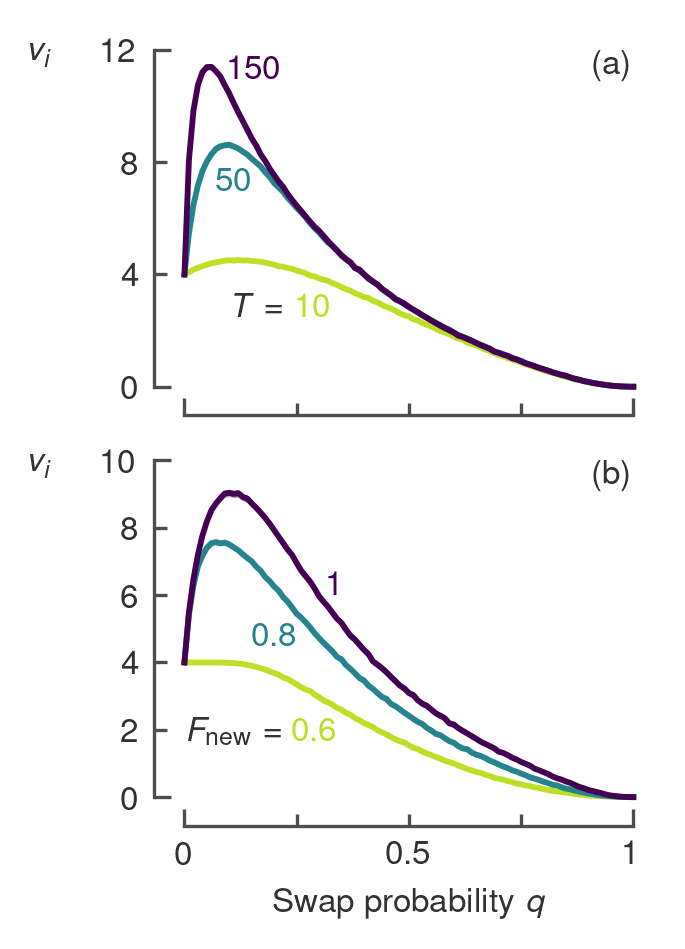

In [5]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

plt.style.use('figure.mplstyle')

mm = 1/25.4  # Convert inches to mm
outward = 2  # Positioning axes outward
ratio = 4/3  # Plot aspect reatio 
color_text = (0, 0, 0, 0.8)  
tudelft_sea_green = '#6ec8bb'

col = plt.cm.viridis([0.0, 0.45, 0.9])  # Plot line colors

v_max_time_cutoff = 12
v_max_max_swap_dist = 10

fig, ax = plt.subplots(2, 1, constrained_layout=True, figsize=[(86)*mm, 86*mm/4*3.6], sharex='col') 

std_factor = 6

# Plotting data
prob_swap_range = np.arange(0, prob_swap_sweep_size)/(prob_swap_sweep_size-1)
for i in range(0, len(time_cutoff_range)):
    # For the sweep over the cutoff times, q = 0 has not been run due to time considerations so we add manually as v_i = 4 deterministically
    ax[0].plot(prob_swap_range, np.hstack(([4], virt_nbhd_size_mean_inf_sq_time_cutoff[i, :])), color=col[i], zorder = -i)
    ax[0].fill_between(prob_swap_range, np.hstack(([4], virt_nbhd_size_mean_inf_sq_time_cutoff[i, :]))-std_factor*np.hstack(([0], virt_nbhd_size_std_error_inf_sq_time_cutoff[i, :])), np.hstack(([4], virt_nbhd_size_mean_inf_sq_time_cutoff[i, :]))+std_factor*np.hstack(([0], virt_nbhd_size_std_error_inf_sq_time_cutoff[i, :])), color=col[i], linewidth = 0, alpha=0.4, zorder=-i-3)

for i in range(0, len(max_swap_dist_range)):
    ax[1].plot(prob_swap_range, np.hstack(([4], virt_nbhd_size_mean_inf_sq_max_swap_dist[i, :])), color=col[i], zorder = -i)
    ax[1].fill_between(prob_swap_range, np.hstack(([4], virt_nbhd_size_mean_inf_sq_max_swap_dist[i, :]))-std_factor*np.hstack(([0], virt_nbhd_size_std_error_inf_sq_max_swap_dist[i, :])), np.hstack(([4], virt_nbhd_size_mean_inf_sq_max_swap_dist[i, :]))+std_factor*np.hstack(([0], virt_nbhd_size_std_error_inf_sq_max_swap_dist[i, :])), color=col[i], linewidth = 0, alpha=0.4, zorder=-i-3)

    
# Set axes
ax[0].spines['left'].set_position(('outward', outward))
ax[0].spines['left'].set_bounds(0, v_max_time_cutoff)
ax[0].set_yticks(ticks=[0, v_max_time_cutoff])
ax[0].set_yticks(ticks=[4, 8], minor=True)
ax[0].set_yticklabels(labels=[4, 8], minor=True, ha='right')

ax[0].spines['bottom'].set_position(('outward', outward))
ax[0].spines['bottom'].set_bounds(0, 1)

ax[1].spines['left'].set_position(('outward', outward))
ax[1].spines['left'].set_bounds(0, v_max_max_swap_dist)
ax[1].set_yticks(ticks=[0, v_max_max_swap_dist])
ax[1].set_yticks(ticks=[2, 4, 6, 8], minor=True)
ax[1].set_yticklabels(labels=[2, 4, 6, 8], minor=True, ha='right')

ax[1].spines['bottom'].set_position(('outward', outward))
ax[1].spines['bottom'].set_bounds(0, 1)
ax[1].set_xticks(ticks=[0, 1], minor=False)
ax[1].set_xticks(ticks=[0.25, 0.50, 0.75], minor=True)
ax[1].set_xticklabels(labels=[{}, 0.5, {}], minor=True)


# Axes labels
ax[0].set_ylabel(r'$ v_i$', rotation=0, y=0.9, labelpad = 12, ha='right')

ax[1].set_xlabel(r'Swap probability $q$', color=color_text, ha='center')
ax[1].set_ylabel(r'$ v_i$', rotation=0, y=0.9, labelpad = 12, ha='right')

# Legends
ax[0].text(0.11, 2.5, r'$T=$', color=color_text)
ax[0].text(0.25, 2.5, r'$10$', color=col[2])
ax[0].text(0.07, 7, r'$50$', color=col[1])
ax[0].text(0.10, 11, r'$150$', color=col[0])

ax[1].text(0.005, 1.7, r'$F_{\mathrm{new}}=$', color=color_text)
ax[1].text(0.24, 1.7, r'$0.6$', color=col[2])
ax[1].text(0.15, 4.5, r'$0.8$', color=col[1])
ax[1].text(0.32, 6, r'$1$', color=col[0])

# Setting plot limits and aspect ratio
ax[0].set_ylim([0-0.06*v_max_time_cutoff, v_max_time_cutoff+0.06*v_max_time_cutoff])
ax[0].set_aspect(1/(v_max_time_cutoff*ratio))

ax[1].set_ylim([0-0.06*v_max_max_swap_dist, v_max_max_swap_dist+0.06*v_max_max_swap_dist])
ax[1].set_aspect(1/(v_max_max_swap_dist*ratio))

# Labels
ax[0].text(1, v_max_time_cutoff, r'(a)', color=color_text, ha='right', va='top')
ax[1].text(1, v_max_max_swap_dist, r'(b)', color=color_text, ha='right', va='top')

# fig.savefig('figures/inf_sq.pdf', bbox_inches = 'tight', pad_inches=0*mm)

### Appendix
#### The virtual neighborhood size and virtual node degree in infinite regular networks (chain, honeycomb lattice, square lattice, triangular lattice) for varying cutoff times

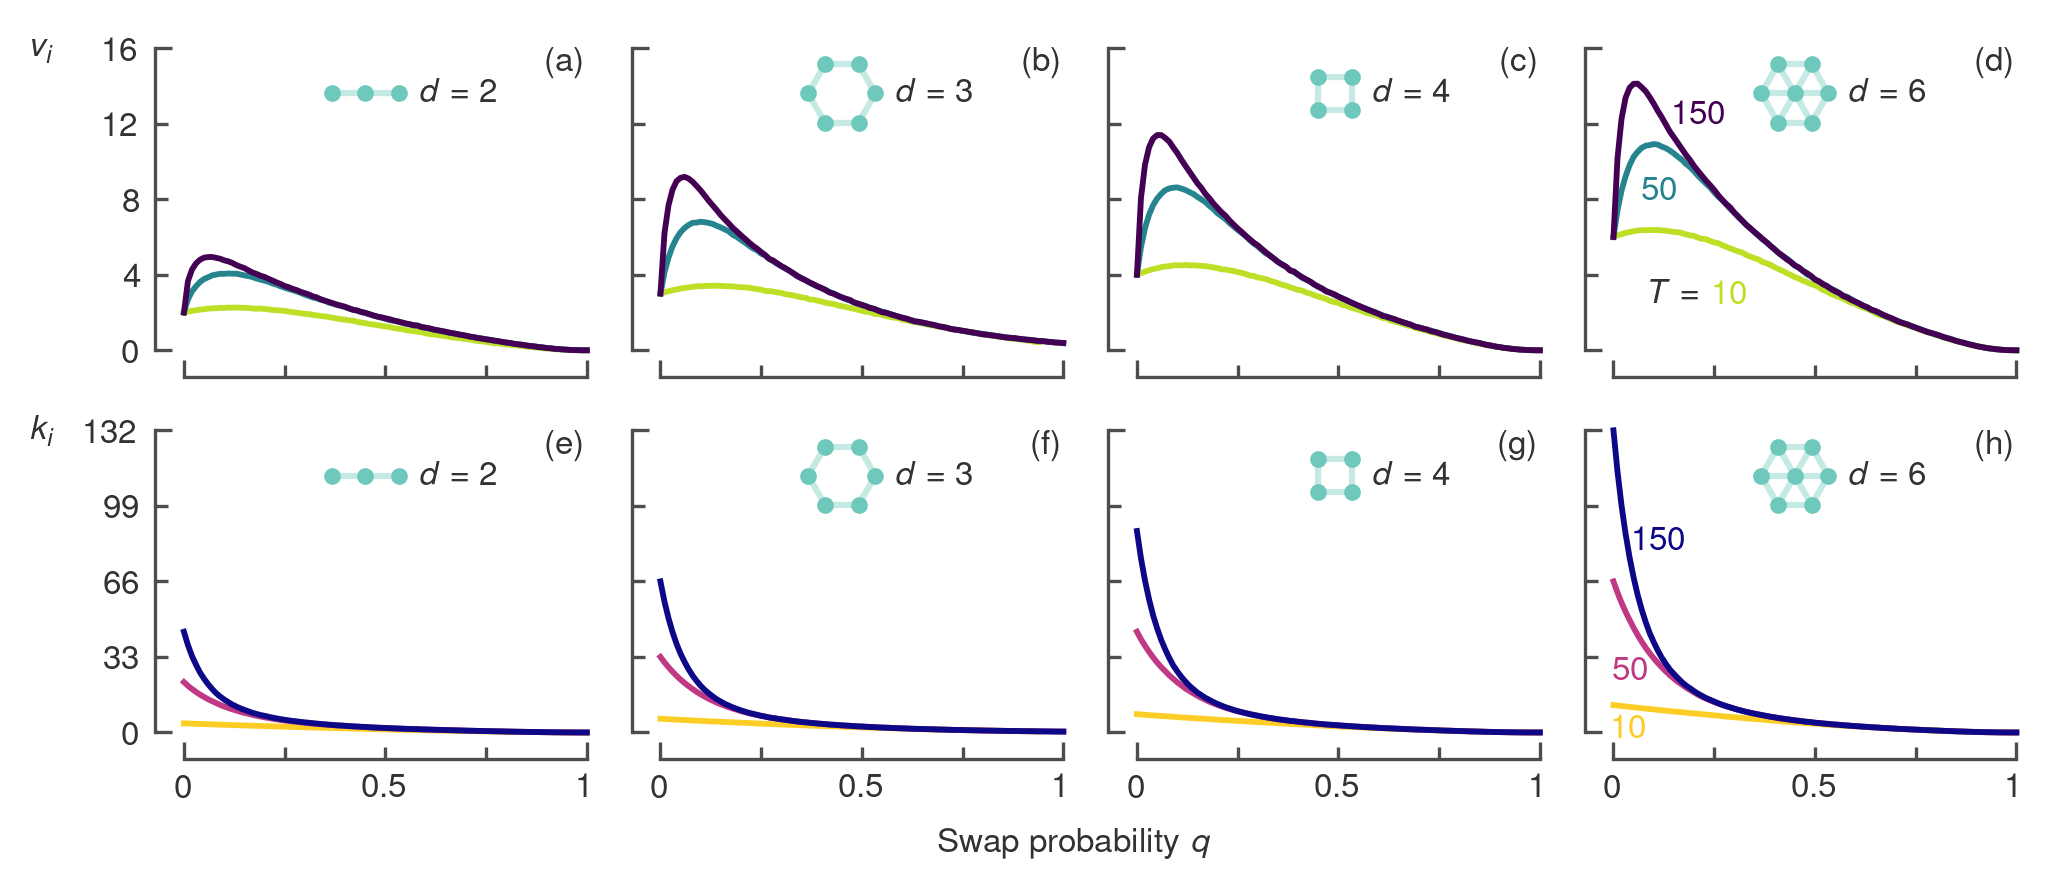

In [6]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

plt.style.use('figure.mplstyle')

mm = 1/25.4  # Convert inches to mm
outward = 2  # Positioning axes outward
ratio = 4/3  # Plot aspect reatio 
color_text = (0, 0, 0, 0.8)  
tudelft_sea_green = '#6ec8bb'
prob_swap_range = np.arange(0, prob_swap_sweep_size)/(prob_swap_sweep_size-1)

v_max = 16
k_max = 6*time_cutoff_range[0]

std_factor = 6

fig, ax = plt.subplots(2, 4, constrained_layout=True, figsize=[2*(86)*mm, 86*mm/4*3.4], sharex='col', sharey='row') 

######### Virtual neighborhood size #########
col = plt.cm.viridis([0, 0.45, 0.9])  # Plot line colors

for i in range(0, len(time_cutoff_range)):
    ax[0, 0].plot(prob_swap_range, np.hstack(([2], virt_nbhd_size_mean_inf_chain_time_cutoff[i, :])), color=col[i], zorder = -i)
    ax[0, 0].fill_between(prob_swap_range, np.hstack(([2], virt_nbhd_size_mean_inf_chain_time_cutoff[i, :]))-std_factor*np.hstack(([0], virt_nbhd_size_std_error_inf_chain_time_cutoff[i, :])), np.hstack(([2], virt_nbhd_size_mean_inf_chain_time_cutoff[i, :]))+std_factor*np.hstack(([0], virt_nbhd_size_std_error_inf_chain_time_cutoff[i, :])), color=col[i], linewidth = 0, alpha=0.4, zorder=-i-3)

for i in range(0, len(time_cutoff_range)-1):
    ax[0, 1].plot(prob_swap_range, np.hstack(([3], virt_nbhd_size_mean_inf_honeycomb_time_cutoff[i, :])), color=col[i], zorder = -i)
    ax[0, 1].fill_between(prob_swap_range, np.hstack(([3], virt_nbhd_size_mean_inf_honeycomb_time_cutoff[i, :]))-std_factor*np.hstack(([0], virt_nbhd_size_std_error_inf_honeycomb_time_cutoff[i, :])), np.hstack(([3], virt_nbhd_size_mean_inf_honeycomb_time_cutoff[i, :]))+std_factor*np.hstack(([0], virt_nbhd_size_std_error_inf_honeycomb_time_cutoff[i, :])), color=col[i], linewidth = 0, alpha=0.4, zorder=-i-3)

# For q = 0.95, 0.96, ..., 1, the performance metrics do not converge to a steady state; see analysis below
ax[0, 1].plot(prob_swap_range[:-6], np.hstack(([3], virt_nbhd_size_mean_inf_honeycomb_time_cutoff[2, :-6])), color=col[2], zorder = -2)
ax[0, 1].fill_between(prob_swap_range[:-6], np.hstack(([3], virt_nbhd_size_mean_inf_honeycomb_time_cutoff[2, :-6]))-std_factor*np.hstack(([0], virt_nbhd_size_std_error_inf_honeycomb_time_cutoff[2, :-6])), np.hstack(([3], virt_nbhd_size_mean_inf_honeycomb_time_cutoff[2, :-6]))+std_factor*np.hstack(([0], virt_nbhd_size_std_error_inf_honeycomb_time_cutoff[2, :-6])), color=col[2], linewidth = 0, alpha=0.4, zorder=-2-3)
 
    
for i in range(0, len(time_cutoff_range)):
    ax[0, 2].plot(prob_swap_range, np.hstack(([4], virt_nbhd_size_mean_inf_sq_time_cutoff[i, :])), color=col[i], zorder = -i)
    ax[0, 2].fill_between(prob_swap_range, np.hstack(([4], virt_nbhd_size_mean_inf_sq_time_cutoff[i, :]))-std_factor*np.hstack(([0], virt_nbhd_size_std_error_inf_sq_time_cutoff[i, :])), np.hstack(([4], virt_nbhd_size_mean_inf_sq_time_cutoff[i, :]))+std_factor*np.hstack(([0], virt_nbhd_size_std_error_inf_sq_time_cutoff[i, :])), color=col[i], linewidth = 0, alpha=0.4, zorder=-i-3)

for i in range(0, len(time_cutoff_range)):
    ax[0, 3].plot(prob_swap_range, np.hstack(([6], virt_nbhd_size_mean_inf_tri_time_cutoff[i, :])), color=col[i], zorder = -i)
    ax[0, 3].fill_between(prob_swap_range, np.hstack(([6], virt_nbhd_size_mean_inf_tri_time_cutoff[i, :]))-std_factor*np.hstack(([0], virt_nbhd_size_std_error_inf_tri_time_cutoff[i, :])), np.hstack(([6], virt_nbhd_size_mean_inf_tri_time_cutoff[i, :]))+std_factor*np.hstack(([0], virt_nbhd_size_std_error_inf_tri_time_cutoff[i, :])), color=col[i], linewidth = 0, alpha=0.4, zorder=-i-3)
    
# Legend
ax[0, 3].text(0.09, 2.5, r'$T=$', color=color_text)
ax[0, 3].text(0.25, 2.5, r'$10$', color=col[2])
ax[0, 3].text(0.07, 8, r'$50$', color=col[1])
ax[0, 3].text(0.15, 12, r'$150$', color=col[0])
    
    
######### Virtual node degree #########
col = plt.cm.plasma([0, 0.45, 0.9])
   
for i in range(0, len(time_cutoff_range)):
    ax[1, 0].plot(prob_swap_range, np.hstack(([time_cutoff_range[i]*2], virt_node_deg_mean_inf_chain_time_cutoff[i, :])), color=col[i], zorder = -i)
    ax[1, 0].fill_between(prob_swap_range, np.hstack(([time_cutoff_range[i]*2], virt_node_deg_mean_inf_chain_time_cutoff[i, :]))-std_factor*np.hstack(([0], virt_node_deg_std_error_inf_chain_time_cutoff[i, :])), np.hstack(([time_cutoff_range[i]*2], virt_node_deg_mean_inf_chain_time_cutoff[i, :]))+std_factor*np.hstack(([0], virt_node_deg_std_error_inf_chain_time_cutoff[i, :])), color=col[i], linewidth = 0, alpha=0.4, zorder=-i-3)

for i in range(0, len(time_cutoff_range)-1):
    ax[1, 1].plot(prob_swap_range, np.hstack(([time_cutoff_range[i]*3], virt_node_deg_mean_inf_honeycomb_time_cutoff[i, :])), color=col[i], zorder = -i)
    ax[1, 1].fill_between(prob_swap_range, np.hstack(([time_cutoff_range[i]*3], virt_node_deg_mean_inf_honeycomb_time_cutoff[i, :]))-std_factor*np.hstack(([0], virt_node_deg_std_error_inf_honeycomb_time_cutoff[i, :])), np.hstack(([time_cutoff_range[i]*3], virt_node_deg_mean_inf_honeycomb_time_cutoff[i, :]))+std_factor*np.hstack(([0], virt_node_deg_std_error_inf_honeycomb_time_cutoff[i, :])), color=col[i], linewidth = 0, alpha=0.4, zorder=-i-3)

# For q = 0.95, 0.96, ..., 1, the performance metrics do not converge to a steady state; see analysis below
ax[1, 1].plot(prob_swap_range[:-6], np.hstack(([time_cutoff_range[2]*3], virt_node_deg_mean_inf_honeycomb_time_cutoff[2, :-6])), color=col[2], zorder = -2)
ax[1, 1].fill_between(prob_swap_range[:-6], np.hstack(([time_cutoff_range[2]*3], virt_node_deg_mean_inf_honeycomb_time_cutoff[2, :-6]))-std_factor*np.hstack(([0], virt_node_deg_std_error_inf_honeycomb_time_cutoff[2, :-6])), np.hstack(([time_cutoff_range[2]*3], virt_node_deg_mean_inf_honeycomb_time_cutoff[2, :-6]))+std_factor*np.hstack(([0], virt_node_deg_std_error_inf_honeycomb_time_cutoff[2, :-6])), color=col[2], linewidth = 0, alpha=0.4, zorder=-2-3)
 
for i in range(0, len(time_cutoff_range)):
    ax[1, 2].plot(prob_swap_range, np.hstack(([time_cutoff_range[i]*4], virt_node_deg_mean_inf_sq_time_cutoff[i, :])), color=col[i], zorder = -i)
    ax[1, 2].fill_between(prob_swap_range, np.hstack(([time_cutoff_range[i]*4], virt_node_deg_mean_inf_sq_time_cutoff[i, :]))-std_factor*np.hstack(([0], virt_node_deg_std_error_inf_sq_time_cutoff[i, :])), np.hstack(([time_cutoff_range[i]*4], virt_node_deg_mean_inf_sq_time_cutoff[i, :]))+std_factor*np.hstack(([0], virt_node_deg_std_error_inf_sq_time_cutoff[i, :])), color=col[i], linewidth = 0, alpha=0.4, zorder=-i-3)

for i in range(0, len(time_cutoff_range)):
    ax[1, 3].plot(prob_swap_range, np.hstack(([time_cutoff_range[i]*6], virt_node_deg_mean_inf_tri_time_cutoff[i, :])), color=col[i], zorder = -i)
    ax[1, 3].fill_between(prob_swap_range, np.hstack(([time_cutoff_range[i]*6], virt_node_deg_mean_inf_tri_time_cutoff[i, :]))-std_factor*np.hstack(([0], virt_node_deg_std_error_inf_tri_time_cutoff[i, :])), np.hstack(([time_cutoff_range[i]*6], virt_node_deg_mean_inf_tri_time_cutoff[i, :]))+std_factor*np.hstack(([0], virt_node_deg_std_error_inf_tri_time_cutoff[i, :])), color=col[i], linewidth = 0, alpha=0.4, zorder=-i-3)

    
# Set axes
for i in range(4):
    ax[0, i].spines['left'].set_position(('outward', outward))
    ax[0, i].spines['left'].set_bounds(0, v_max)
    ax[0, i].set_yticks(ticks=[0, v_max])
    ax[0, i].set_yticks(ticks=[4, 8, 12], minor=True)
    ax[0, i].set_yticklabels(labels=[4, 8, 12], minor=True, ha='right')

    ax[0, i].spines['bottom'].set_position(('outward', outward))
    ax[0, i].spines['bottom'].set_bounds(0, 1)

    ax[1, i].spines['left'].set_position(('outward', outward))
    ax[1, i].spines['left'].set_bounds(0, k_max)
    ax[1, i].set_yticks(ticks=[0, k_max])
    ax[1, i].set_yticks(ticks=[33, 66, 99], minor=True)
    ax[1, i].set_yticklabels(labels=[33, 66, 99], minor=True, ha='right')

    ax[1, i].spines['bottom'].set_position(('outward', outward))
    ax[1, i].spines['bottom'].set_bounds(0, 1)
    ax[1, i].set_xticks(ticks=[0, 1], minor=False)
    ax[1, i].set_xticks(ticks=[0.25, 0.50, 0.75], minor=True)
    ax[1, i].set_xticklabels(labels=[{}, 0.5, {}], minor=True)


# Axes labels
fig.supxlabel(r'Swap probability $q$', color=color_text, ha='center', fontsize=8, x=0.52)

ax[0, 0].set_ylabel(r'$ v_i$', rotation=0, y=0.9, labelpad = 12, ha='right')
ax[1, 0].set_ylabel(r'$ k_i$', rotation=0, y=0.9, labelpad = 8, ha='right')

#Legends
ax[1, 3].text(0.0, -2, r'$10$', color=col[2])
ax[1, 3].text(0, 23, r'$50$', color=col[1])
ax[1, 3].text(0.05, 80, r'$150$', color=col[0])


x_0 = 0.45
y_0 = 0.85*v_max
delta_x = 0.25/3
delta_y = v_max*delta_x*ratio

ms=6
lw=1.5
a=0.4

# Chain
ax[0, 0].plot([x_0-delta_x, x_0, x_0+delta_x], [y_0, y_0, y_0], '.', markersize=ms, color=tudelft_sea_green)
ax[0, 0].plot([x_0-delta_x, x_0, x_0+delta_x], [y_0, y_0, y_0], '-', linewidth=lw, color=tudelft_sea_green, alpha=a)
ax[0, 0].text(x_0+0.3*x_0, y_0, '$d=2$', ha='left', va='center', color=color_text)

# Honeycomb
for i in range(6):
    ax[0, 1].plot(x_0+delta_x*np.cos(i*np.pi/3), y_0+delta_y*np.sin(i*np.pi/3), '.', markersize=ms, color=tudelft_sea_green)
    ax[0, 1].plot([x_0+delta_x*np.cos(i*np.pi/3), x_0+delta_x*np.cos((i+1)*np.pi/3)], [y_0+delta_y*np.sin(i*np.pi/3), y_0+delta_y*np.sin((i+1)*np.pi/3)], '-', linewidth=lw, color=tudelft_sea_green, alpha=a)

ax[0, 1].text(x_0+0.3*x_0, y_0, '$d=3$', ha='left', va='center', color=color_text)

# Square
ax[0, 2].plot([x_0, x_0+delta_x, x_0+delta_x, x_0], [y_0-delta_y/2, y_0-delta_y/2, y_0+delta_y/2, y_0+delta_y/2], '.', markersize=ms, color=tudelft_sea_green)
ax[0, 2].plot([x_0, x_0+delta_x, x_0+delta_x, x_0, x_0], [y_0-delta_y/2, y_0-delta_y/2, y_0+delta_y/2, y_0+delta_y/2, y_0-delta_y/2], '-', linewidth=lw, color=tudelft_sea_green, alpha=a)
ax[0, 2].text(x_0+0.3*x_0, y_0, '$d=4$', ha='left', va='center', color=color_text)

# Hexagonal
ax[0, 3].plot(x_0, y_0, '.', markersize=ms, color=tudelft_sea_green)
for i in range(6):
    ax[0, 3].plot(x_0+delta_x*np.cos(i*np.pi/3), y_0+delta_y*np.sin(i*np.pi/3), '.', markersize=ms, color=tudelft_sea_green)
    ax[0, 3].plot([x_0+delta_x*np.cos(i*np.pi/3), x_0+delta_x*np.cos((i+1)*np.pi/3)], [y_0+delta_y*np.sin(i*np.pi/3), y_0+delta_y*np.sin((i+1)*np.pi/3)], '-', linewidth=lw, color=tudelft_sea_green, alpha=a)
    ax[0, 3].plot([x_0+delta_x*np.cos(i*np.pi/3), x_0], [y_0+delta_y*np.sin(i*np.pi/3), y_0], '-', linewidth=lw, color=tudelft_sea_green, alpha=a)

ax[0, 3].text(x_0+0.3*x_0, y_0, '$d=6$', ha='left', va='center', color=color_text)

x_0 = 0.45
y_0 = 0.85*k_max
delta_x = 0.25/3
delta_y = k_max*delta_x*ratio

# Chain
ax[1, 0].plot([x_0-delta_x, x_0, x_0+delta_x], [y_0, y_0, y_0], '.', markersize=ms, color=tudelft_sea_green)
ax[1, 0].plot([x_0-delta_x, x_0, x_0+delta_x], [y_0, y_0, y_0], '-', linewidth=lw, color=tudelft_sea_green, alpha=a)
ax[1, 0].text(x_0+0.3*x_0, y_0, '$d=2$', ha='left', va='center', color=color_text)

# Honeycomb
for i in range(6):
    ax[1, 1].plot(x_0+delta_x*np.cos(i*np.pi/3), y_0+delta_y*np.sin(i*np.pi/3), '.', markersize=ms, color=tudelft_sea_green)
    ax[1, 1].plot([x_0+delta_x*np.cos(i*np.pi/3), x_0+delta_x*np.cos((i+1)*np.pi/3)], [y_0+delta_y*np.sin(i*np.pi/3), y_0+delta_y*np.sin((i+1)*np.pi/3)], '-', linewidth=lw, color=tudelft_sea_green, alpha=a)

ax[1, 1].text(x_0+0.3*x_0, y_0, '$d=3$', ha='left', va='center', color=color_text)

# Square
ax[1, 2].plot([x_0, x_0+delta_x, x_0+delta_x, x_0], [y_0-delta_y/2, y_0-delta_y/2, y_0+delta_y/2, y_0+delta_y/2], '.', markersize=ms, color=tudelft_sea_green)
ax[1, 2].plot([x_0, x_0+delta_x, x_0+delta_x, x_0, x_0], [y_0-delta_y/2, y_0-delta_y/2, y_0+delta_y/2, y_0+delta_y/2, y_0-delta_y/2], '-', linewidth=lw, color=tudelft_sea_green, alpha=a)
ax[1, 2].text(x_0+0.3*x_0, y_0, '$d=4$', ha='left', va='center', color=color_text)

# Hexagonal
ax[1, 3].plot(x_0, y_0, '.', markersize=ms, color=tudelft_sea_green)
for i in range(6):
    ax[1, 3].plot(x_0+delta_x*np.cos(i*np.pi/3), y_0+delta_y*np.sin(i*np.pi/3), '.', markersize=ms, color=tudelft_sea_green)
    ax[1, 3].plot([x_0+delta_x*np.cos(i*np.pi/3), x_0+delta_x*np.cos((i+1)*np.pi/3)], [y_0+delta_y*np.sin(i*np.pi/3), y_0+delta_y*np.sin((i+1)*np.pi/3)], '-', linewidth=lw, color=tudelft_sea_green, alpha=a)
    ax[1, 3].plot([x_0+delta_x*np.cos(i*np.pi/3), x_0], [y_0+delta_y*np.sin(i*np.pi/3), y_0], '-', linewidth=lw, color=tudelft_sea_green, alpha=a)

ax[1, 3].text(x_0+0.3*x_0, y_0, '$d=6$', ha='left', va='center', color=color_text)

# Setting plot limits and aspect ratio
for i in range(4):
    # ax[0].set_xlim([-0.06, 1.1])
    ax[0, i].set_ylim([0-0.06*v_max, v_max+0.06*v_max])
    ax[0, i].set_aspect(1/(v_max*ratio))

    # ax[1].set_xlim([-0.06, 1.1])
    ax[1, i].set_ylim([0-0.06*k_max, k_max+0.06*k_max])
    ax[1, i].set_aspect(1/(k_max*ratio))
    
ax[0, 0].text(1, v_max, r'(a)', color=color_text, ha='right', va='top')
ax[0, 1].text(1, v_max, r'(b)', color=color_text, ha='right', va='top')
ax[0, 2].text(1, v_max, r'(c)', color=color_text, ha='right', va='top')
ax[0, 3].text(1, v_max, r'(d)', color=color_text, ha='right', va='top')

ax[1, 0].text(1, k_max, r'(e)', color=color_text, ha='right', va='top')
ax[1, 1].text(1, k_max, r'(f)', color=color_text, ha='right', va='top')
ax[1, 2].text(1, k_max, r'(g)', color=color_text, ha='right', va='top')
ax[1, 3].text(1, k_max, r'(h)', color=color_text, ha='right', va='top')

# fig.savefig('figures/inf_networks_time_cutoff.pdf', bbox_inches = 'tight', pad_inches=0*mm)

#### The virtual neighborhood size and virtual node degree in infinite regular networks (chain, honeycomb lattice, square lattice, triangular lattice) for varying maximum swap distances

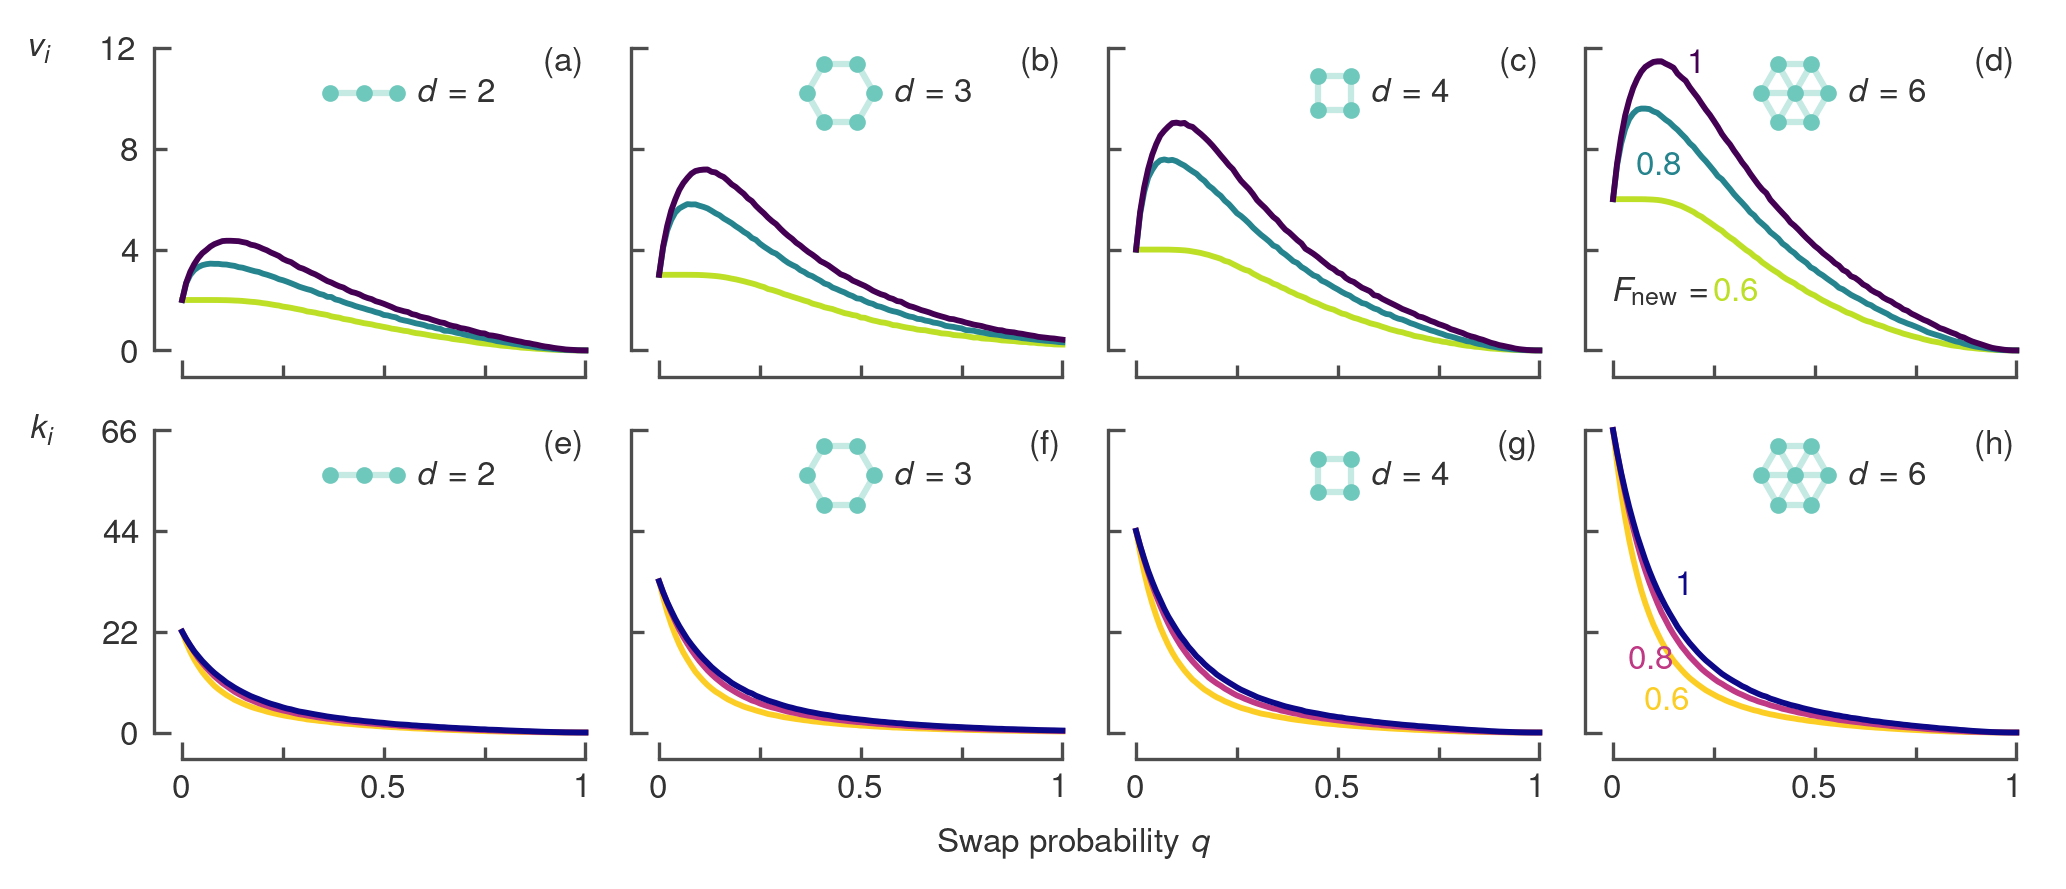

In [7]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

plt.style.use('figure.mplstyle')

mm = 1/25.4  # Convert inches to mm
outward = 2  # Positioning axes outward
ratio = 4/3  # Plot aspect reatio 
color_text = (0, 0, 0, 0.8)  
tudelft_sea_green = '#6ec8bb'
prob_swap_range = np.arange(0, prob_swap_sweep_size)/(prob_swap_sweep_size-1)

v_max = 12
k_max = 6*time_cutoff

std_factor = 6

fig, ax = plt.subplots(2, 4, constrained_layout=True, figsize=[2*(86)*mm, 86*mm/4*3.4], sharex='col', sharey='row') 
# Plotting data

######### Virtual neighborhood size #########
col = plt.cm.viridis([0, 0.45, 0.9])  # Plot line colors

for i in range(0, len(max_swap_dist_range)):
    ax[0, 0].plot(prob_swap_range, np.hstack(([2], virt_nbhd_size_mean_inf_chain_max_swap_dist[i, :])), color=col[i], zorder = -i)
    ax[0, 0].fill_between(prob_swap_range, np.hstack(([2], virt_nbhd_size_mean_inf_chain_max_swap_dist[i, :]))-std_factor*np.hstack(([0], virt_nbhd_size_std_error_inf_chain_max_swap_dist[i, :])), np.hstack(([2], virt_nbhd_size_mean_inf_chain_max_swap_dist[i, :]))+std_factor*np.hstack(([0], virt_nbhd_size_std_error_inf_chain_max_swap_dist[i, :])), color=col[i], linewidth = 0, alpha=0.4, zorder=-i-3)

for i in range(0, len(max_swap_dist_range)):
    ax[0, 1].plot(prob_swap_range, np.hstack(([3], virt_nbhd_size_mean_inf_honeycomb_max_swap_dist[i, :])), color=col[i], zorder = -i)
    ax[0, 1].fill_between(prob_swap_range, np.hstack(([3], virt_nbhd_size_mean_inf_honeycomb_max_swap_dist[i, :]))-std_factor*np.hstack(([0], virt_nbhd_size_std_error_inf_honeycomb_max_swap_dist[i, :])), np.hstack(([3], virt_nbhd_size_mean_inf_honeycomb_max_swap_dist[i, :]))+std_factor*np.hstack(([0], virt_nbhd_size_std_error_inf_honeycomb_max_swap_dist[i, :])), color=col[i], linewidth = 0, alpha=0.4, zorder=-i-3)

for i in range(0, len(max_swap_dist_range)):
    ax[0, 2].plot(prob_swap_range, np.hstack(([4], virt_nbhd_size_mean_inf_sq_max_swap_dist[i, :])), color=col[i], zorder = -i)
    ax[0, 2].fill_between(prob_swap_range, np.hstack(([4], virt_nbhd_size_mean_inf_sq_max_swap_dist[i, :]))-std_factor*np.hstack(([0], virt_nbhd_size_std_error_inf_sq_max_swap_dist[i, :])), np.hstack(([4], virt_nbhd_size_mean_inf_sq_max_swap_dist[i, :]))+std_factor*np.hstack(([0], virt_nbhd_size_std_error_inf_sq_max_swap_dist[i, :])), color=col[i], linewidth = 0, alpha=0.4, zorder=-i-3)

for i in range(0, len(max_swap_dist_range)):
    ax[0, 3].plot(prob_swap_range, np.hstack(([6], virt_nbhd_size_mean_inf_tri_max_swap_dist[i, :])), color=col[i], zorder = -i)
    ax[0, 3].fill_between(prob_swap_range, np.hstack(([6], virt_nbhd_size_mean_inf_tri_max_swap_dist[i, :]))-std_factor*np.hstack(([0], virt_nbhd_size_std_error_inf_tri_max_swap_dist[i, :])), np.hstack(([6], virt_nbhd_size_mean_inf_tri_max_swap_dist[i, :]))+std_factor*np.hstack(([0], virt_nbhd_size_std_error_inf_tri_max_swap_dist[i, :])), color=col[i], linewidth = 0, alpha=0.4, zorder=-i-3)

# Legend
ax[0, 3].text(0.0, 2, r'$F_{\mathrm{new}}=$', color=color_text)
ax[0, 3].text(0.25, 2, r'$0.6$', color=col[2])
ax[0, 3].text(0.06, 7, r'$0.8$', color=col[1])
ax[0, 3].text(0.19, 11, r'$1$', color=col[0])
    
######### Virtual node degree #########
col = plt.cm.plasma([0, 0.45, 0.9])

for i in range(0, len(max_swap_dist_range)):
    ax[1, 0].plot(prob_swap_range, np.hstack(([time_cutoff*2], virt_node_deg_mean_inf_chain_max_swap_dist[i, :])), color=col[i], zorder = -i)
    ax[1, 0].fill_between(prob_swap_range, np.hstack(([time_cutoff*2], virt_node_deg_mean_inf_chain_max_swap_dist[i, :]))-std_factor*np.hstack(([0], virt_node_deg_std_error_inf_chain_max_swap_dist[i, :])), np.hstack(([time_cutoff*2], virt_node_deg_mean_inf_chain_max_swap_dist[i, :]))+std_factor*np.hstack(([0], virt_node_deg_std_error_inf_chain_max_swap_dist[i, :])), color=col[i], linewidth = 0, alpha=0.4, zorder=-i-3)

for i in range(0, len(max_swap_dist_range)):
    ax[1, 1].plot(prob_swap_range, np.hstack(([time_cutoff*3], virt_node_deg_mean_inf_honeycomb_max_swap_dist[i, :])), color=col[i], zorder = -i)
    ax[1, 1].fill_between(prob_swap_range, np.hstack(([time_cutoff*3], virt_node_deg_mean_inf_honeycomb_max_swap_dist[i, :]))-std_factor*np.hstack(([0], virt_node_deg_std_error_inf_honeycomb_max_swap_dist[i, :])), np.hstack(([time_cutoff*3], virt_node_deg_mean_inf_honeycomb_max_swap_dist[i, :]))+std_factor*np.hstack(([0], virt_node_deg_std_error_inf_honeycomb_max_swap_dist[i, :])), color=col[i], linewidth = 0, alpha=0.4, zorder=-i-3)

for i in range(0, len(max_swap_dist_range)):
    ax[1, 2].plot(prob_swap_range, np.hstack(([time_cutoff*4], virt_node_deg_mean_inf_sq_max_swap_dist[i, :])), color=col[i], zorder = -i)
    ax[1, 2].fill_between(prob_swap_range, np.hstack(([time_cutoff*4], virt_node_deg_mean_inf_sq_max_swap_dist[i, :]))-std_factor*np.hstack(([0], virt_node_deg_std_error_inf_sq_max_swap_dist[i, :])), np.hstack(([time_cutoff*4], virt_node_deg_mean_inf_sq_max_swap_dist[i, :]))+std_factor*np.hstack(([0], virt_node_deg_std_error_inf_sq_max_swap_dist[i, :])), color=col[i], linewidth = 0, alpha=0.4, zorder=-i-3)

for i in range(0, len(max_swap_dist_range)):
    ax[1, 3].plot(prob_swap_range, np.hstack(([time_cutoff*6], virt_node_deg_mean_inf_tri_max_swap_dist[i, :])), color=col[i], zorder = -i)
    ax[1, 3].fill_between(prob_swap_range, np.hstack(([time_cutoff*6], virt_node_deg_mean_inf_tri_max_swap_dist[i, :]))-std_factor*np.hstack(([0], virt_node_deg_std_error_inf_tri_max_swap_dist[i, :])), np.hstack(([time_cutoff*6], virt_node_deg_mean_inf_tri_max_swap_dist[i, :]))+std_factor*np.hstack(([0], virt_node_deg_std_error_inf_tri_max_swap_dist[i, :])), color=col[i], linewidth = 0, alpha=0.4, zorder=-i-3)

# Set axes
for i in range(4):
    ax[0, i].spines['left'].set_position(('outward', outward))
    ax[0, i].spines['left'].set_bounds(0, v_max)
    ax[0, i].set_yticks(ticks=[0, v_max])
    ax[0, i].set_yticks(ticks=[4, 8], minor=True)
    ax[0, i].set_yticklabels(labels=[4, 8], minor=True, ha='right')

    ax[0, i].spines['bottom'].set_position(('outward', outward))
    ax[0, i].spines['bottom'].set_bounds(0, 1)

    ax[1, i].spines['left'].set_position(('outward', outward))
    ax[1, i].spines['left'].set_bounds(0, k_max)
    ax[1, i].set_yticks(ticks=[0, k_max])
    ax[1, i].set_yticks(ticks=[22, 44], minor=True)
    ax[1, i].set_yticklabels(labels=[22, 44], minor=True, ha='right')

    ax[1, i].spines['bottom'].set_position(('outward', outward))
    ax[1, i].spines['bottom'].set_bounds(0, 1)
    ax[1, i].set_xticks(ticks=[0, 1], minor=False)
    ax[1, i].set_xticks(ticks=[0.25, 0.50, 0.75], minor=True)
    ax[1, i].set_xticklabels(labels=[{}, 0.5, {}], minor=True)


# Axes labels
fig.supxlabel(r'Swap probability $q$', color=color_text, ha='center', fontsize=8, x=0.52)

ax[0, 0].set_ylabel(r'$ v_i$', rotation=0, y=0.9, labelpad = 12, ha='right')
ax[1, 0].set_ylabel(r'$ k_i$', rotation=0, y=0.9, labelpad = 12, ha='right')

#Legends
ax[1, 3].text(0.08, 5, r'$0.6$', color=col[2])
ax[1, 3].text(0.04, 14, r'$0.8$', color=col[1])
ax[1, 3].text(0.16, 30, r'$1$', color=col[0])

x_0 = 0.45
y_0 = 0.85*v_max
delta_x = 0.25/3
delta_y = v_max*delta_x*ratio

ms=6
lw=1.5
a=0.4

# Chain
ax[0, 0].plot([x_0-delta_x, x_0, x_0+delta_x], [y_0, y_0, y_0], '.', markersize=ms, color=tudelft_sea_green)
ax[0, 0].plot([x_0-delta_x, x_0, x_0+delta_x], [y_0, y_0, y_0], '-', linewidth=lw, color=tudelft_sea_green, alpha=a)
ax[0, 0].text(x_0+0.3*x_0, y_0, '$d=2$', ha='left', va='center', color=color_text)

# Honeycomb
for i in range(6):
    ax[0, 1].plot(x_0+delta_x*np.cos(i*np.pi/3), y_0+delta_y*np.sin(i*np.pi/3), '.', markersize=ms, color=tudelft_sea_green)
    ax[0, 1].plot([x_0+delta_x*np.cos(i*np.pi/3), x_0+delta_x*np.cos((i+1)*np.pi/3)], [y_0+delta_y*np.sin(i*np.pi/3), y_0+delta_y*np.sin((i+1)*np.pi/3)], '-', linewidth=lw, color=tudelft_sea_green, alpha=a)

ax[0, 1].text(x_0+0.3*x_0, y_0, '$d=3$', ha='left', va='center', color=color_text)

# Square
ax[0, 2].plot([x_0, x_0+delta_x, x_0+delta_x, x_0], [y_0-delta_y/2, y_0-delta_y/2, y_0+delta_y/2, y_0+delta_y/2], '.', markersize=ms, color=tudelft_sea_green)
ax[0, 2].plot([x_0, x_0+delta_x, x_0+delta_x, x_0, x_0], [y_0-delta_y/2, y_0-delta_y/2, y_0+delta_y/2, y_0+delta_y/2, y_0-delta_y/2], '-', linewidth=lw, color=tudelft_sea_green, alpha=a)
ax[0, 2].text(x_0+0.3*x_0, y_0, '$d=4$', ha='left', va='center', color=color_text)

# Hexagonal
ax[0, 3].plot(x_0, y_0, '.', markersize=ms, color=tudelft_sea_green)
for i in range(6):
    ax[0, 3].plot(x_0+delta_x*np.cos(i*np.pi/3), y_0+delta_y*np.sin(i*np.pi/3), '.', markersize=ms, color=tudelft_sea_green)
    ax[0, 3].plot([x_0+delta_x*np.cos(i*np.pi/3), x_0+delta_x*np.cos((i+1)*np.pi/3)], [y_0+delta_y*np.sin(i*np.pi/3), y_0+delta_y*np.sin((i+1)*np.pi/3)], '-', linewidth=lw, color=tudelft_sea_green, alpha=a)
    ax[0, 3].plot([x_0+delta_x*np.cos(i*np.pi/3), x_0], [y_0+delta_y*np.sin(i*np.pi/3), y_0], '-', linewidth=lw, color=tudelft_sea_green, alpha=a)

ax[0, 3].text(x_0+0.3*x_0, y_0, '$d=6$', ha='left', va='center', color=color_text)

x_0 = 0.45
y_0 = 0.85*k_max
delta_x = 0.25/3
delta_y = k_max*delta_x*ratio

# Chain
ax[1, 0].plot([x_0-delta_x, x_0, x_0+delta_x], [y_0, y_0, y_0], '.', markersize=ms, color=tudelft_sea_green)
ax[1, 0].plot([x_0-delta_x, x_0, x_0+delta_x], [y_0, y_0, y_0], '-', linewidth=lw, color=tudelft_sea_green, alpha=a)
ax[1, 0].text(x_0+0.3*x_0, y_0, '$d=2$', ha='left', va='center', color=color_text)

# Honeycomb
for i in range(6):
    ax[1, 1].plot(x_0+delta_x*np.cos(i*np.pi/3), y_0+delta_y*np.sin(i*np.pi/3), '.', markersize=ms, color=tudelft_sea_green)
    ax[1, 1].plot([x_0+delta_x*np.cos(i*np.pi/3), x_0+delta_x*np.cos((i+1)*np.pi/3)], [y_0+delta_y*np.sin(i*np.pi/3), y_0+delta_y*np.sin((i+1)*np.pi/3)], '-', linewidth=lw, color=tudelft_sea_green, alpha=a)

ax[1, 1].text(x_0+0.3*x_0, y_0, '$d=3$', ha='left', va='center', color=color_text)

# Square
ax[1, 2].plot([x_0, x_0+delta_x, x_0+delta_x, x_0], [y_0-delta_y/2, y_0-delta_y/2, y_0+delta_y/2, y_0+delta_y/2], '.', markersize=ms, color=tudelft_sea_green)
ax[1, 2].plot([x_0, x_0+delta_x, x_0+delta_x, x_0, x_0], [y_0-delta_y/2, y_0-delta_y/2, y_0+delta_y/2, y_0+delta_y/2, y_0-delta_y/2], '-', linewidth=lw, color=tudelft_sea_green, alpha=a)
ax[1, 2].text(x_0+0.3*x_0, y_0, '$d=4$', ha='left', va='center', color=color_text)

# Hexagonal
ax[1, 3].plot(x_0, y_0, '.', markersize=ms, color=tudelft_sea_green)
for i in range(6):
    ax[1, 3].plot(x_0+delta_x*np.cos(i*np.pi/3), y_0+delta_y*np.sin(i*np.pi/3), '.', markersize=ms, color=tudelft_sea_green)
    ax[1, 3].plot([x_0+delta_x*np.cos(i*np.pi/3), x_0+delta_x*np.cos((i+1)*np.pi/3)], [y_0+delta_y*np.sin(i*np.pi/3), y_0+delta_y*np.sin((i+1)*np.pi/3)], '-', linewidth=lw, color=tudelft_sea_green, alpha=a)
    ax[1, 3].plot([x_0+delta_x*np.cos(i*np.pi/3), x_0], [y_0+delta_y*np.sin(i*np.pi/3), y_0], '-', linewidth=lw, color=tudelft_sea_green, alpha=a)

ax[1, 3].text(x_0+0.3*x_0, y_0, '$d=6$', ha='left', va='center', color=color_text)


# Setting plot limits and aspect ratio
for i in range(4):
    # ax[0].set_xlim([-0.06, 1.1])
    ax[0, i].set_ylim([0-0.06*v_max, v_max+0.06*v_max])
    ax[0, i].set_aspect(1/(v_max*ratio))

    ax[1, i].set_ylim([0-0.06*k_max, k_max+0.06*k_max])
    ax[1, i].set_aspect(1/(k_max*ratio))
    
ax[0, 0].text(1, v_max, r'(a)', color=color_text, ha='right', va='top')
ax[0, 1].text(1, v_max, r'(b)', color=color_text, ha='right', va='top')
ax[0, 2].text(1, v_max, r'(c)', color=color_text, ha='right', va='top')
ax[0, 3].text(1, v_max, r'(d)', color=color_text, ha='right', va='top')

ax[1, 0].text(1, k_max, r'(e)', color=color_text, ha='right', va='top')
ax[1, 1].text(1, k_max, r'(f)', color=color_text, ha='right', va='top')
ax[1, 2].text(1, k_max, r'(g)', color=color_text, ha='right', va='top')
ax[1, 3].text(1, k_max, r'(h)', color=color_text, ha='right', va='top')

# fig.savefig('figures/inf_networks_max_swap_dist.pdf', bbox_inches = 'tight', pad_inches=0*mm)

#### Maximum virtual neighbhorhood size for increasing physical node degree

Increasing the physical node degree $d$ increases the maximum value of virt_nbhd_size. Going from $d=2$ to $d=3$ oncreases the maximum value by more than $3/2$, but increasing $d$ to $4,6$ shows diminishing returns on the increase of $v_i$.

In [8]:
print('For varying cutoff times, the ratio of the maximum virtual neighborhood to the relative increase in physical node degrees:')
print(' - Honeycomb lattice to chain:', np.amax(virt_nbhd_size_mean_inf_honeycomb_time_cutoff, axis=1)/np.amax(virt_nbhd_size_mean_inf_chain_time_cutoff, axis=1)/1.5)
print(' - Square lattice to chain:', np.amax(virt_nbhd_size_mean_inf_sq_time_cutoff, axis=1)/np.amax(virt_nbhd_size_mean_inf_chain_time_cutoff, axis=1)/2)
print(' - Triangular lattice to chain:', np.amax(virt_nbhd_size_mean_inf_tri_time_cutoff, axis=1)/np.amax(virt_nbhd_size_mean_inf_chain_time_cutoff, axis=1)/3)

For varying cutoff times, the ratio of the maximum virtual neighborhood to the relative increase in physical node degrees:
 - Honeycomb lattice to chain: [1.2390706  1.11578844 1.00721628]
 - Square lattice to chain: [1.15353789 1.06029162 0.99750376]
 - Triangular lattice to chain: [0.9524436  0.89508799 0.93830815]


In [9]:
print('For varying maximum swap distances, the ratio of the maximum virtual neighborhood to the relative increase in physical node degrees:')
print(' - Honeycomb lattice to chain:', np.amax(virt_nbhd_size_mean_inf_honeycomb_max_swap_dist, axis=1)/np.amax(virt_nbhd_size_mean_inf_chain_max_swap_dist, axis=1)/1.5)
print(' - Square lattice to chain:', np.amax(virt_nbhd_size_mean_inf_sq_max_swap_dist, axis=1)/np.amax(virt_nbhd_size_mean_inf_chain_max_swap_dist, axis=1)/2)
print(' - Triangular lattice to chain:', np.amax(virt_nbhd_size_mean_inf_tri_max_swap_dist, axis=1)/np.amax(virt_nbhd_size_mean_inf_chain_max_swap_dist, axis=1)/3)

For varying maximum swap distances, the ratio of the maximum virtual neighborhood to the relative increase in physical node degrees:
 - Honeycomb lattice to chain: [1.10035101 1.12415376 1.        ]
 - Square lattice to chain: [1.03889042 1.10058982 1.        ]
 - Triangular lattice to chain: [0.87904845 0.92926945 1.        ]


## 2. Performance metrics in infinite square-lattice networks for varying probabilistic generation success and probabilistic swap success

In [10]:
import numpy as np
prob_swap_sweep_size = 101
prob_swap_range = np.arange(0, prob_swap_sweep_size)/(prob_swap_sweep_size-1)
max_swap_dist = 2
time_cutoff = 11

prob_succ_gen_range = [0.25, 0.5, 0.99]
prob_succ_swap_range = [1, 0.75, 0.5]
time_cutoff_range = [int(np.floor(time_cutoff/prob_succ_gen_range[i])) for i in range(len(prob_succ_gen_range))]

In [11]:
# Import, reshape and rename data
data_inf_sq_prob_succ_gen = np.load('data/data_inf_sq_prob_succ_gen.npy')
data_inf_sq_prob_succ_swap = np.load('data/data_inf_sq_prob_succ_swap.npy') 

data_inf_sq_prob_succ_gen = np.reshape(data_inf_sq_prob_succ_gen, (len(prob_succ_gen_range), len(prob_swap_range), 8))
data_inf_sq_prob_succ_swap = np.reshape(data_inf_sq_prob_succ_swap, (len(prob_succ_swap_range), len(prob_swap_range), 8))


#  Probability of successfully generating entanglement
###################################################################################
virt_nbhd_size_mean_inf_sq_prob_succ_gen = data_inf_sq_prob_succ_gen[:, :, 0]
virt_nbhd_size_std_error_inf_sq_prob_succ_gen = data_inf_sq_prob_succ_gen[:, :, 1]
virt_nbhd_size_error_inf_sq_prob_succ_gen = data_inf_sq_prob_succ_gen[:, :, 2]
virt_nbhd_size_max_diff_inf_sq_prob_succ_gen = data_inf_sq_prob_succ_gen[:, :, 3]

virt_node_deg_mean_inf_sq_prob_succ_gen = data_inf_sq_prob_succ_gen[:, :, 4]
virt_node_deg_std_error_inf_sq_prob_succ_gen = data_inf_sq_prob_succ_gen[:, :, 5]
virt_node_deg_error_inf_sq_prob_succ_gen = data_inf_sq_prob_succ_gen[:, :, 6]
virt_node_deg_max_diff_inf_sq_prob_succ_gen = data_inf_sq_prob_succ_gen[:, :, 7]

#  Probability of successfully swapping entanglement
###################################################################################
virt_nbhd_size_mean_inf_sq_prob_succ_swap = data_inf_sq_prob_succ_swap[:, :, 0]
virt_nbhd_size_std_error_inf_sq_prob_succ_swap = data_inf_sq_prob_succ_swap[:, :, 1]
virt_nbhd_size_error_inf_sq_prob_succ_swap = data_inf_sq_prob_succ_swap[:, :, 2]
virt_nbhd_size_max_diff_inf_sq_prob_succ_swap = data_inf_sq_prob_succ_swap[:, :, 3]

virt_node_deg_mean_inf_sq_prob_succ_swap = data_inf_sq_prob_succ_swap[:, :, 4]
virt_node_deg_std_error_inf_sq_prob_succ_swap = data_inf_sq_prob_succ_swap[:, :, 5]
virt_node_deg_error_inf_sq_prob_succ_swap = data_inf_sq_prob_succ_swap[:, :, 6]
virt_node_deg_max_diff_inf_sq_prob_succ_swap = data_inf_sq_prob_succ_swap[:, :, 7]

In [12]:
print('Optimal swap probabilty for prob_succ_gen = [0.5, 0.75, 0.99]: q* = ', prob_swap_range[np.argmax(virt_nbhd_size_mean_inf_sq_prob_succ_gen, axis=1)])
print('Optimal swap probabilty for prob_succ_swap = [1, 0.75, 0.5]: q* = ', prob_swap_range[np.argmax(virt_nbhd_size_mean_inf_sq_prob_succ_swap, axis=1)])

Optimal swap probabilty for prob_succ_gen = [0.5, 0.75, 0.99]: q* =  [0.03 0.05 0.1 ]
Optimal swap probabilty for prob_succ_swap = [1, 0.75, 0.5]: q* =  [0.1  0.1  0.09]


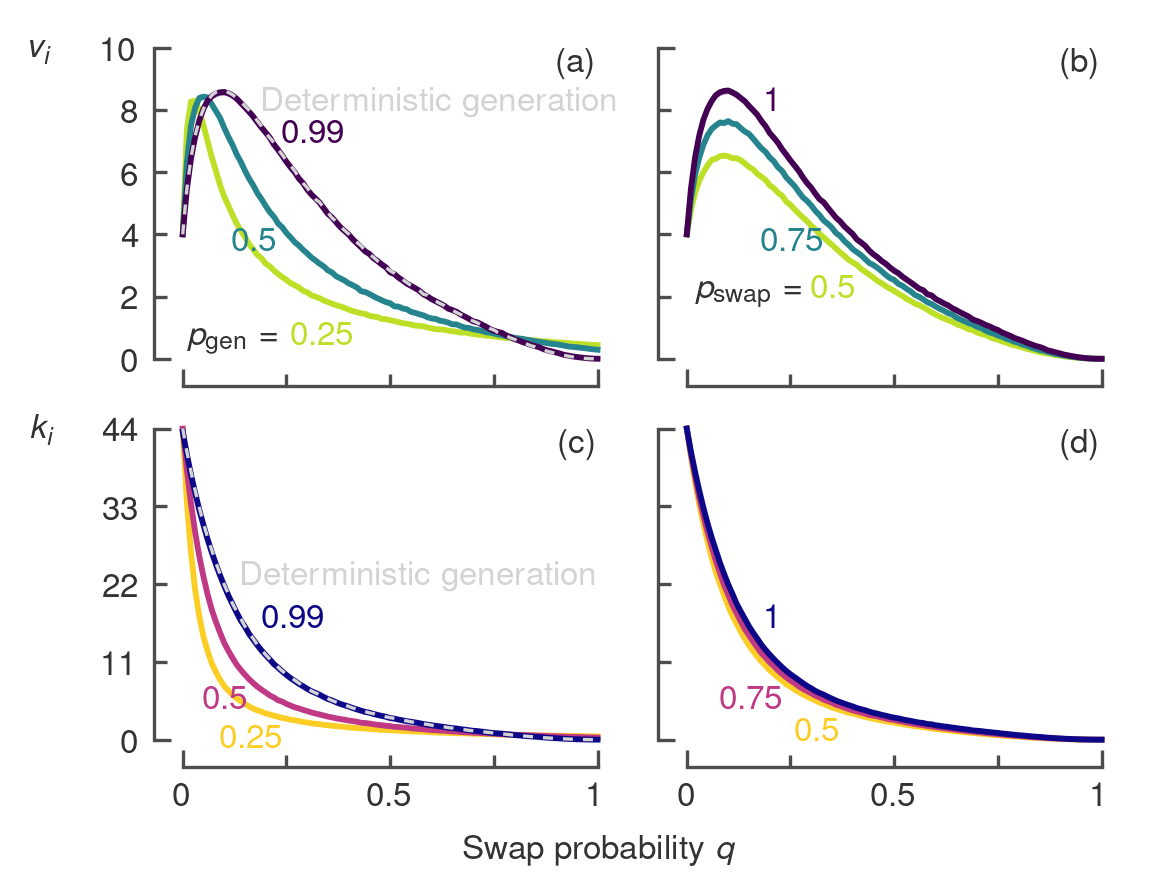

In [13]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

plt.style.use('figure.mplstyle')

mm = 1/25.4  # Convert inches to mm
outward = 2  # Positioning axes outward
ratio = 4/3  # Plot aspect reatio 
color_text = (0, 0, 0, 0.8)  
tudelft_sea_green = '#6ec8bb'

v_max = 10
k_max = 4*time_cutoff

std_factor = 6

fig, ax = plt.subplots(2, 2, constrained_layout=True, figsize=[1.1*(86)*mm, 86*mm/4*3.4], sharex='col', sharey='row') 
# Plotting data

######### Virtual neighborhood size #########
col = plt.cm.viridis([0, 0.45, 0.9])  # Plot line colors

for i in range(0, len(prob_succ_gen_range)):
    ax[0, 0].plot(prob_swap_range, virt_nbhd_size_mean_inf_sq_prob_succ_gen[2-i, :], color=col[i], zorder = -i)
    ax[0, 0].fill_between(prob_swap_range, virt_nbhd_size_mean_inf_sq_prob_succ_gen[2-i, :]-std_factor*virt_nbhd_size_std_error_inf_sq_prob_succ_gen[2-i, :], virt_nbhd_size_mean_inf_sq_prob_succ_gen[2-i, :]+std_factor*virt_nbhd_size_std_error_inf_sq_prob_succ_gen[2-i, :], color=col[i], linewidth = 0, alpha=0.4, zorder=-i-3)

ax[0, 0].plot(prob_swap_range, np.hstack(([4], virt_nbhd_size_mean_inf_sq_time_cutoff[1, :])), '--', dashes=(3, 3), color='lightgray', zorder = 0, linewidth=0.8)
    
for i in range(0, len(prob_succ_gen_range)):
    ax[0, 1].plot(prob_swap_range, virt_nbhd_size_mean_inf_sq_prob_succ_swap[i, :], color=col[i], zorder = -i)
    ax[0, 1].fill_between(prob_swap_range, virt_nbhd_size_mean_inf_sq_prob_succ_swap[i, :]-std_factor*virt_nbhd_size_std_error_inf_sq_prob_succ_swap[i, :], virt_nbhd_size_mean_inf_sq_prob_succ_swap[i, :]+std_factor*virt_nbhd_size_std_error_inf_sq_prob_succ_swap[i, :], color=col[i], linewidth = 0, alpha=0.4, zorder=-i-3)

    
# Legend
ax[0, 0].text(0.01, 0.5, r'$p_{\mathrm{gen}}=$', color=color_text)
ax[0, 0].text(0.26, 0.5, r'$0.25$', color=col[2])
ax[0, 0].text(0.12, 3.5, r'$0.5$', color=col[1])
ax[0, 0].text(0.24, 7, r'$0.99$', color=col[0])
ax[0, 0].text(0.19, 8, r'Deterministic generation', color='lightgray')

ax[0, 1].text(0.02, 2, r'$p_{\mathrm{swap}}=$', color=color_text)
ax[0, 1].text(0.3, 2, r'$0.5$', color=col[2])
ax[0, 1].text(0.18, 3.5, r'$0.75$', color=col[1])
ax[0, 1].text(0.19, 8, r'$1$', color=col[0])
    
######### Virtual node degree #########
col = plt.cm.plasma([0, 0.45, 0.9])

for i in range(0, len(prob_succ_swap_range)):
    ax[1, 0].plot(prob_swap_range, virt_node_deg_mean_inf_sq_prob_succ_gen[2-i, :], color=col[i], zorder = -i)
    ax[1, 0].fill_between(prob_swap_range, virt_node_deg_mean_inf_sq_prob_succ_gen[2-i, :]-std_factor*virt_node_deg_std_error_inf_sq_prob_succ_gen[2-i, :], virt_node_deg_mean_inf_sq_prob_succ_gen[2-i, :]+std_factor*virt_node_deg_std_error_inf_sq_prob_succ_gen[2-i, :], color=col[i], linewidth = 0, alpha=0.4, zorder=-i-3)

ax[1, 0].plot(prob_swap_range, np.hstack(([4*time_cutoff], virt_node_deg_mean_inf_sq_time_cutoff[1, :])), '--', dashes=(3, 3), color='lightgray', zorder = 0, linewidth=0.8)

for i in range(0, len(prob_succ_swap_range)):
    ax[1, 1].plot(prob_swap_range, virt_node_deg_mean_inf_sq_prob_succ_swap[i, :], color=col[i], zorder = -i)
    ax[1, 1].fill_between(prob_swap_range, virt_node_deg_mean_inf_sq_prob_succ_swap[i, :]-std_factor*virt_node_deg_std_error_inf_sq_prob_succ_swap[i, :], virt_node_deg_mean_inf_sq_prob_succ_swap[i, :]+std_factor*virt_node_deg_std_error_inf_sq_prob_succ_swap[i, :], color=col[i], linewidth = 0, alpha=0.4, zorder=-i-3)

# Set axes
for i in range(2):
    ax[0, i].spines['left'].set_position(('outward', outward))
    ax[0, i].spines['left'].set_bounds(0, v_max)
    ax[0, i].set_yticks(ticks=[0, v_max])
    ax[0, i].set_yticks(ticks=[2, 4, 6, 8], minor=True)
    ax[0, i].set_yticklabels(labels=[2, 4, 6, 8], minor=True, ha='right')

    ax[0, i].spines['bottom'].set_position(('outward', outward))
    ax[0, i].spines['bottom'].set_bounds(0, 1)

    ax[1, i].spines['left'].set_position(('outward', outward))
    ax[1, i].spines['left'].set_bounds(0, k_max)
    ax[1, i].set_yticks(ticks=[0, k_max])
    ax[1, i].set_yticks(ticks=[11,22,33], minor=True)
    ax[1, i].set_yticklabels(labels=[11,22,33], minor=True, ha='right')

    ax[1, i].spines['bottom'].set_position(('outward', outward))
    ax[1, i].spines['bottom'].set_bounds(0, 1)
    ax[1, i].set_xticks(ticks=[0, 1], minor=False)
    ax[1, i].set_xticks(ticks=[0.25, 0.50, 0.75], minor=True)
    ax[1, i].set_xticklabels(labels=[{}, 0.5, {}], minor=True)


# Axes labels
fig.supxlabel(r'Swap probability $q$', color=color_text, ha='center', fontsize=8, x=0.52)

ax[0, 0].set_ylabel(r'$ v_i$', rotation=0, y=0.9, labelpad = 12, ha='right')
ax[1, 0].set_ylabel(r'$ k_i$', rotation=0, y=0.9, labelpad = 12, ha='right')

# Legends
ax[1, 0].text(0.09, -1, r'$0.25$', color=col[2])
ax[1, 0].text(0.05, 4.5, r'$0.5$', color=col[1])
ax[1, 0].text(0.19, 16, r'$0.99$', color=col[0])
ax[1, 0].text(0.14, 22, r'Deterministic generation', color='lightgray')

ax[1, 1].text(0.26, 0, r'$0.5$', color=col[2])
ax[1, 1].text(0.08, 4.5, r'$0.75$', color=col[1])
ax[1, 1].text(0.19, 16, r'$1$', color=col[0])

# Setting plot limits and aspect ratio
for i in range(2):
    # ax[0].set_xlim([-0.06, 1.1])
    ax[0, i].set_ylim([0-0.06*v_max, v_max+0.06*v_max])
    ax[0, i].set_aspect(1/(v_max*ratio))

    # ax[1].set_xlim([-0.06, 1.1])
    ax[1, i].set_ylim([0-0.06*k_max, k_max+0.06*k_max])
    ax[1, i].set_aspect(1/(k_max*ratio))
    
# Labels
ax[0, 0].text(1, v_max, r'(a)', color=color_text, ha='right', va='top')
ax[0, 1].text(1, v_max, r'(b)', color=color_text, ha='right', va='top')
ax[1, 0].text(1, k_max, r'(c)', color=color_text, ha='right', va='top')
ax[1, 1].text(1, k_max, r'(d)', color=color_text, ha='right', va='top')

# fig.savefig('figures/inf_sq_prob_succ_gen_swap.pdf', bbox_inches = 'tight', pad_inches=0*mm)

## 3. Performance metrics in infinite square-lattice networks for different varying cutoff times and entanglement generation fidelity
#### More data for the virtual neighborhood size in infinite square-lattice networks for varying cutoff times and maximum swap distances

In [14]:
import numpy as np
prob_swap_sweep_size = 101
prob_swap_range = np.arange(0, prob_swap_sweep_size)/(prob_swap_sweep_size-1)
max_swap_dist_range = [2, 1, 0]
time_cutoff = 6

time_cutoff_range = [42, 14, 3]
max_swap_dist = 1
number_of_samples = 10000

In [15]:
data_inf_sq_time_cutoff_ext_data = np.load('data/data_inf_sq_time_cutoff_ext_data.npy')
data_inf_sq_max_swap_dist_ext_data = np.load('data/data_inf_sq_max_swap_dist_ext_data.npy') 

data_inf_sq_time_cutoff_ext_data = np.reshape(data_inf_sq_time_cutoff_ext_data, (len(time_cutoff_range), len(prob_swap_range), 8))
data_inf_sq_max_swap_dist_ext_data = np.reshape(data_inf_sq_max_swap_dist_ext_data, (len(max_swap_dist_range), len(prob_swap_range), 8))

virt_nbhd_size_mean_inf_sq_time_cutoff_ext_data = data_inf_sq_time_cutoff_ext_data[:, :, 0]
virt_nbhd_size_std_error_inf_sq_time_cutoff_ext_data = data_inf_sq_time_cutoff_ext_data[:, :, 1]
virt_nbhd_size_error_inf_sq_time_cutoff_ext_data = data_inf_sq_time_cutoff_ext_data[:, :, 2]
virt_nbhd_size_max_diff_inf_sq_time_cutoff_ext_data = data_inf_sq_time_cutoff_ext_data[:, :, 3]

virt_node_deg_mean_inf_sq_time_cutoff_ext_data = data_inf_sq_time_cutoff_ext_data[:, :, 4]
virt_node_deg_std_error_inf_sq_time_cutoff_ext_data = data_inf_sq_time_cutoff_ext_data[:, :, 5]
virt_node_deg_error_inf_sq_time_cutoff_ext_data = data_inf_sq_time_cutoff_ext_data[:, :, 6]
virt_node_deg_max_diff_inf_sq_time_cutoff_ext_data = data_inf_sq_time_cutoff_ext_data[:, :, 7]

virt_nbhd_size_mean_inf_sq_max_swap_dist_ext_data = data_inf_sq_max_swap_dist_ext_data[:, :, 0]
virt_nbhd_size_std_error_inf_sq_max_swap_dist_ext_data = data_inf_sq_max_swap_dist_ext_data[:, :, 1]
virt_nbhd_size_error_inf_sq_max_swap_dist_ext_data = data_inf_sq_max_swap_dist_ext_data[:, :, 2]
virt_nbhd_size_max_diff_inf_sq_max_swap_dist_ext_data = data_inf_sq_max_swap_dist_ext_data[:, :, 3]

virt_node_deg_mean_inf_sq_max_swap_dist_ext_data = data_inf_sq_max_swap_dist_ext_data[:, :, 4]
virt_node_deg_std_error_inf_sq_max_swap_dist_ext_data = data_inf_sq_max_swap_dist_ext_data[:, :, 5]
virt_node_deg_error_inf_sq_max_swap_dist_ext_data = data_inf_sq_max_swap_dist_ext_data[:, :, 6]
virt_node_deg_max_diff_inf_sq_max_swap_dist_ext_data = data_inf_sq_max_swap_dist_ext_data[:, :, 7]

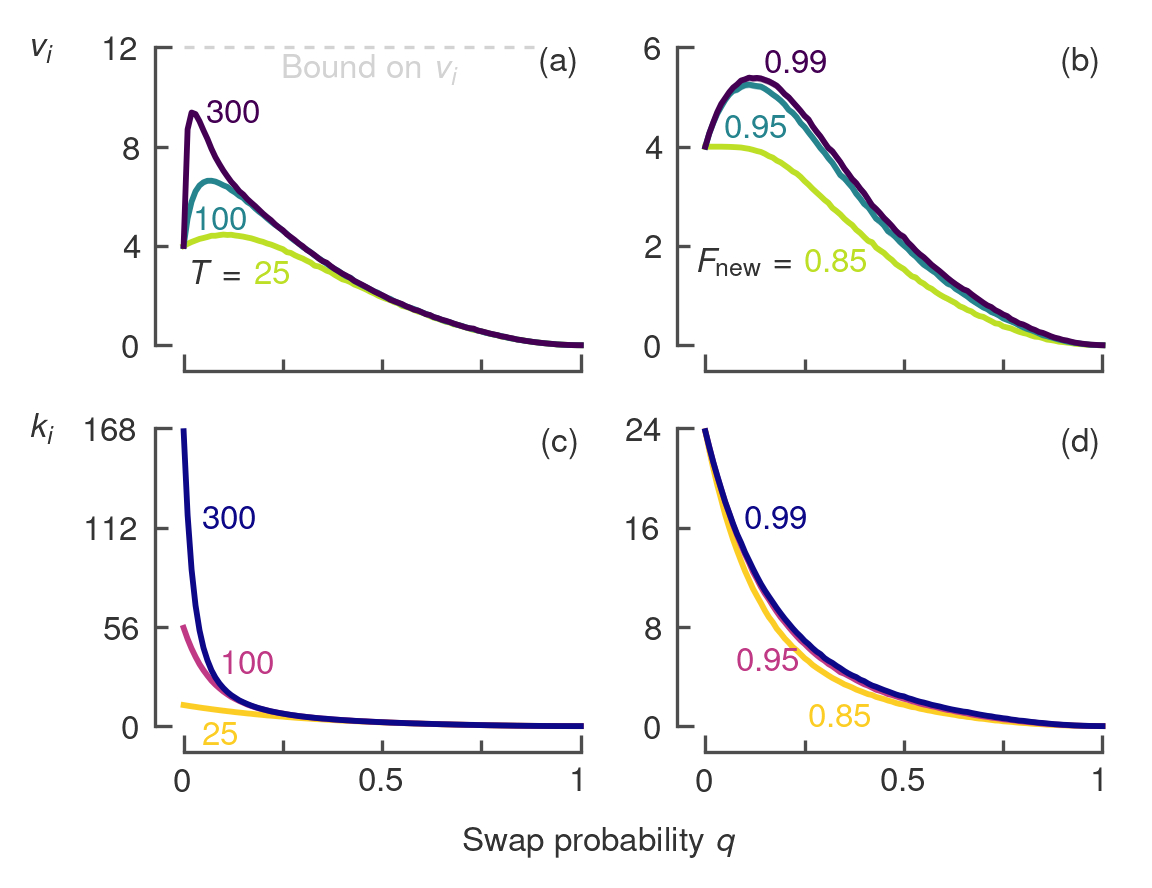

In [16]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

plt.style.use('figure.mplstyle')

mm = 1/25.4  # Convert inches to mm
outward = 2  # Positioning axes outward
ratio = 4/3  # Plot aspect reatio 
color_text = (0, 0, 0, 0.8)  
tudelft_sea_green = '#6ec8bb'

v_max = [12, 6]
k_max = [4*time_cutoff_range[0], 4*time_cutoff]

std_factor = 6

fig, ax = plt.subplots(2, 2, constrained_layout=True, figsize=[1.1*(86)*mm, 86*mm/4*3.4], sharex='col') 
# Plotting data

######### Virtual neighborhood size #########
col = plt.cm.viridis([0, 0.45, 0.9])  # Plot line colors

prob_swap_range = np.arange(0, prob_swap_sweep_size)/(prob_swap_sweep_size-1)
for i in range(0, len(time_cutoff_range)):
    ax[0, 0].plot(prob_swap_range, virt_nbhd_size_mean_inf_sq_time_cutoff_ext_data[i, :], color=col[i], zorder = -i)
    ax[0, 0].fill_between(prob_swap_range, virt_nbhd_size_mean_inf_sq_time_cutoff_ext_data[i, :]-std_factor*virt_nbhd_size_std_error_inf_sq_time_cutoff_ext_data[i, :], virt_nbhd_size_mean_inf_sq_time_cutoff_ext_data[i, :]+std_factor*virt_nbhd_size_std_error_inf_sq_time_cutoff_ext_data[i, :], color=col[i], linewidth = 0, alpha=0.4, zorder=-i-3)

for i in range(0, len(max_swap_dist_range)):
    ax[0, 1].plot(prob_swap_range, virt_nbhd_size_mean_inf_sq_max_swap_dist_ext_data[i, :], color=col[i], zorder = -i)
    ax[0, 1].fill_between(prob_swap_range, virt_nbhd_size_mean_inf_sq_max_swap_dist_ext_data[i, :]-std_factor*virt_nbhd_size_std_error_inf_sq_max_swap_dist_ext_data[i, :], virt_nbhd_size_mean_inf_sq_max_swap_dist_ext_data[i, :]+std_factor*virt_nbhd_size_std_error_inf_sq_max_swap_dist_ext_data[i, :], color=col[i], linewidth = 0, alpha=0.4, zorder=-i-3)

    
# Legend
ax[0, 0].text(0.02, 2.5, r'$T=$', color=color_text)
ax[0, 0].text(0.18, 2.5, r'$25$', color=col[2])
ax[0, 0].text(0.03, 4.7, r'$100$', color=col[1])
ax[0, 0].text(0.06, 9, r'$300$', color=col[0])

ax[0, 1].text(-0.02, 1.5, r'$F_{\mathrm{new}}=$', color=color_text)
ax[0, 1].text(0.25, 1.5, r'$0.85$', color=col[2])
ax[0, 1].text(0.05, 4.2, r'$0.95$', color=col[1])
ax[0, 1].text(0.15, 5.5, r'$0.99$', color=col[0])

ax[0, 0].plot([0, 0.9], [12, 12], '--', dashes=(3, 3), color='lightgray', zorder = 0, linewidth=0.8)
ax[0, 0].text(0.25, 10.75, r'Bound on $v_i$', color='lightgray')

    
######### Virtual node degree #########
col = plt.cm.plasma([0, 0.45, 0.9])

for i in range(0, len(time_cutoff_range)):
    ax[1, 0].plot(prob_swap_range, virt_node_deg_mean_inf_sq_time_cutoff_ext_data[i, :], color=col[i], zorder = -i)
    ax[1, 0].fill_between(prob_swap_range, virt_node_deg_mean_inf_sq_time_cutoff_ext_data[i, :]-std_factor*virt_node_deg_std_error_inf_sq_time_cutoff_ext_data[i, :], virt_node_deg_mean_inf_sq_time_cutoff_ext_data[i, :]+std_factor*virt_node_deg_std_error_inf_sq_time_cutoff_ext_data[i, :], color=col[i], linewidth = 0, alpha=0.4, zorder=-i-3)


for i in range(0, len(max_swap_dist_range)):
    ax[1, 1].plot(prob_swap_range, virt_node_deg_mean_inf_sq_max_swap_dist_ext_data[i, :], color=col[i], zorder = -i)
    ax[1, 1].fill_between(prob_swap_range, virt_node_deg_mean_inf_sq_max_swap_dist_ext_data[i, :]-std_factor*virt_node_deg_std_error_inf_sq_max_swap_dist_ext_data[i, :], virt_node_deg_mean_inf_sq_max_swap_dist_ext_data[i, :]+std_factor*virt_node_deg_std_error_inf_sq_max_swap_dist_ext_data[i, :], color=col[i], linewidth = 0, alpha=0.4, zorder=-i-3)

# Set axes
for i in range(2):
    ax[0, i].spines['left'].set_position(('outward', outward))
    ax[0, i].spines['left'].set_bounds(0, v_max[i])
    ax[0, i].set_yticks(ticks=[0, v_max[i]])
    ax[0, i].set_yticks(ticks=[int(v_max[i]/3), int(2*v_max[i]/3)], minor=True)
    ax[0, i].set_yticklabels(labels=[int(v_max[i]/3), int(2*v_max[i]/3)], minor=True, ha='right')

    ax[0, i].spines['bottom'].set_position(('outward', outward))
    ax[0, i].spines['bottom'].set_bounds(0, 1)

    ax[1, i].spines['left'].set_position(('outward', outward))
    ax[1, i].spines['left'].set_bounds(0, k_max[i])
    ax[1, i].set_yticks(ticks=[0, k_max[i]])
    ax[1, i].set_yticks(ticks=[int(k_max[i]/3), int(2*k_max[i]/3)], minor=True)
    ax[1, i].set_yticklabels(labels=[int(k_max[i]/3), int(2*k_max[i]/3)], minor=True, ha='right')

    ax[1, i].spines['bottom'].set_position(('outward', outward))
    ax[1, i].spines['bottom'].set_bounds(0, 1)
    ax[1, i].set_xticks(ticks=[0, 1], minor=False)
    ax[1, i].set_xticks(ticks=[0.25, 0.50, 0.75], minor=True)
    ax[1, i].set_xticklabels(labels=[{}, 0.5, {}], minor=True)


# Axes labels
fig.supxlabel(r'Swap probability $q$', color=color_text, ha='center', fontsize=8, x=0.52)

ax[0, 0].set_ylabel(r'$ v_i$', rotation=0, y=0.9, labelpad = 12, ha='right')
ax[1, 0].set_ylabel(r'$ k_i$', rotation=0, y=0.9, labelpad = 8, ha='right')

# Legends
# ax[1, 0].text(-0.02, -1, r'$p_{\mathrm{gen}}=$', color=color_text)
ax[1, 0].text(0.05, -10, r'$25$', color=col[2])
ax[1, 0].text(0.1, 30, r'$100$', color=col[1])
ax[1, 0].text(0.05, 112, r'$300$', color=col[0])

# ax[1, 1].text(-0.02, 0, r'$p_{\mathrm{swap}}=$', color=color_text)
ax[1, 1].text(0.26, 0, r'$0.85$', color=col[2])
ax[1, 1].text(0.08, 4.5, r'$0.95$', color=col[1])
ax[1, 1].text(0.1, 16, r'$0.99$', color=col[0])

# Setting plot limits and aspect ratio
for i in range(2):
    ax[0, i].set_ylim([0-0.06*v_max[i], v_max[i]+0.06*v_max[i]])
    ax[0, i].set_aspect(1/(v_max[i]*ratio))

    ax[1, i].set_ylim([0-0.06*k_max[i], k_max[i]+0.06*k_max[i]])
    ax[1, i].set_aspect(1/(k_max[i]*ratio))
    
# Labels
ax[0, 0].text(1, v_max[0], r'(a)', color=color_text, ha='right', va='top')
ax[0, 1].text(1, v_max[1], r'(b)', color=color_text, ha='right', va='top')
ax[1, 0].text(1, k_max[0], r'(c)', color=color_text, ha='right', va='top')
ax[1, 1].text(1, k_max[1], r'(d)', color=color_text, ha='right', va='top')

# fig.savefig('figures/inf_sq_ext_data.pdf', bbox_inches = 'tight', pad_inches=0*mm)

## 4. Performance metrics convergence to a steady state

In [17]:
prob_swap_range = [0.1, 0.4, 0.7, 1]
time_cutoff_range = [10, 2]
data_inf_sq_conv_time_cutoff_2 = np.load('data/data_inf_sq_conv_time_cutoff_2.npy')
data_inf_sq_conv_time_cutoff_10 = np.load('data/data_inf_sq_conv_time_cutoff_10.npy')

virt_nbhd_size_mean_inf_sq_conv_time_cutoff = [data_inf_sq_conv_time_cutoff_10[:, 0, :], data_inf_sq_conv_time_cutoff_2[:, 0, :]]
virt_nbhd_size_std_error_inf_sq_conv_time_cutoff = [data_inf_sq_conv_time_cutoff_10[:, 1, :], data_inf_sq_conv_time_cutoff_2[:, 1, :]]
virt_node_deg_mean_inf_sq_conv_time_cutoff = [data_inf_sq_conv_time_cutoff_10[:, 2, :], data_inf_sq_conv_time_cutoff_2[:, 2, :]]
virt_node_deg_std_error_inf_sq_conv_time_cutoff = [data_inf_sq_conv_time_cutoff_10[:, 3, :], data_inf_sq_conv_time_cutoff_2[:, 3, :]]


data_inf_honeycomb_conv_time_cutoff_2 = np.load('data/data_inf_honeycomb_conv_time_cutoff_2.npy')
data_inf_honeycomb_conv_time_cutoff_10 = np.load('data/data_inf_honeycomb_conv_time_cutoff_10.npy')

virt_nbhd_size_mean_inf_honeycomb_conv_time_cutoff = [data_inf_honeycomb_conv_time_cutoff_10[:, 0, :], data_inf_honeycomb_conv_time_cutoff_2[:, 0, :]]
virt_nbhd_size_std_error_inf_honeycomb_conv_time_cutoff = [data_inf_honeycomb_conv_time_cutoff_10[:, 1, :], data_inf_honeycomb_conv_time_cutoff_2[:, 1, :]]
virt_node_deg_mean_inf_honeycomb_conv_time_cutoff = [data_inf_honeycomb_conv_time_cutoff_10[:, 2, :], data_inf_honeycomb_conv_time_cutoff_2[:, 2, :]]
virt_node_deg_std_error_inf_honeycomb_conv_time_cutoff = [data_inf_honeycomb_conv_time_cutoff_10[:, 3, :], data_inf_honeycomb_conv_time_cutoff_2[:, 3, :]]

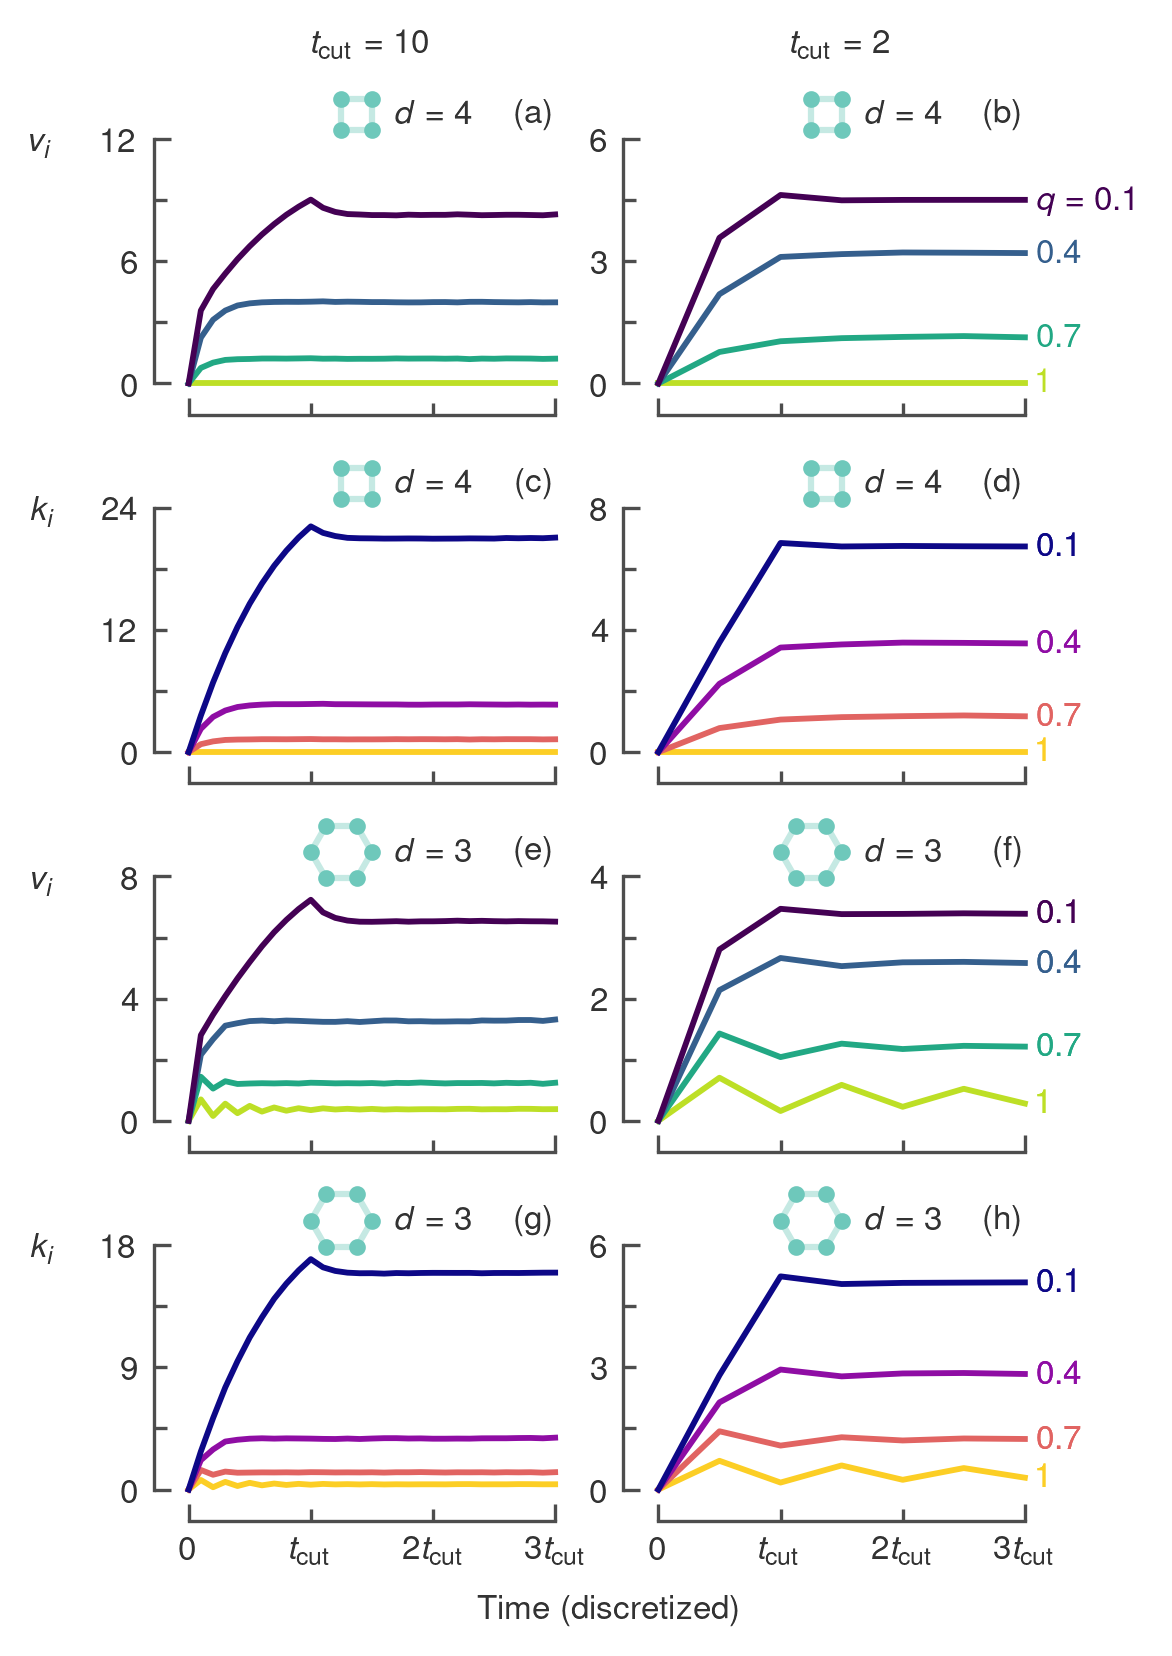

In [18]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

plt.style.use('figure.mplstyle')

mm = 1/25.4  # Convert inches to mm
outward = 4  # Positioning axes outward
ratio = 3/2  # Plot aspect reatio 
color_text = (0, 0, 0, 0.8)  
tudelft_sea_green = '#6ec8bb'

v_max = [12, 6]
k_max = [4*time_cutoff_range[0], 4*time_cutoff]

std_factor = 6

fig, ax = plt.subplots(4, 2, constrained_layout=True, figsize=[1.1*(86)*mm, 1.6*86*mm], sharex='col') 
# Plotting data

######### Virtual neighborhood size #########
col = plt.cm.viridis([0, 0.3, 0.6, 0.9])  # Plot line colors

for i in range(len(time_cutoff_range)):
    for j in range(len(prob_swap_range)):
        ax[0, i].plot(np.arange(3*time_cutoff_range[i]+1), np.hstack(([0], virt_nbhd_size_mean_inf_sq_conv_time_cutoff[i][j])), color=col[j], zorder = -j)
        ax[0, i].fill_between(np.arange(3*time_cutoff_range[i]+1), np.hstack(([0], virt_nbhd_size_mean_inf_sq_conv_time_cutoff[i][j]))-np.hstack(([0], virt_nbhd_size_std_error_inf_sq_conv_time_cutoff[i][j])), np.hstack(([0], virt_nbhd_size_mean_inf_sq_conv_time_cutoff[i][j]))+np.hstack(([0], virt_nbhd_size_std_error_inf_sq_conv_time_cutoff[i][j])), color=col[j], linewidth = 0, alpha=0.4, zorder=-j-4)

ax[0, 1].text(3.1*time_cutoff_range[1], virt_nbhd_size_mean_inf_sq_conv_time_cutoff[1][0][-1], '$q=%s$' %(prob_swap_range[0]), color=col[0], ha='left', va='center')
for j in range(len(prob_swap_range)-1):
    ax[0, 1].text(3.1*time_cutoff_range[1], virt_nbhd_size_mean_inf_sq_conv_time_cutoff[1][j+1][-1], '$%s$' %(prob_swap_range[j+1]), color=col[j+1], ha='left', va='center')

        
for i in range(len(time_cutoff_range)):
    for j in range(len(prob_swap_range)):
        ax[2, i].plot(np.arange(3*time_cutoff_range[i]+1), np.hstack(([0], virt_nbhd_size_mean_inf_honeycomb_conv_time_cutoff[i][j])), color=col[j], zorder = -j)
        ax[2, i].fill_between(np.arange(3*time_cutoff_range[i]+1), np.hstack(([0], virt_nbhd_size_mean_inf_honeycomb_conv_time_cutoff[i][j]))-np.hstack(([0], virt_nbhd_size_std_error_inf_honeycomb_conv_time_cutoff[i][j])), np.hstack(([0], virt_nbhd_size_mean_inf_honeycomb_conv_time_cutoff[i][j]))+np.hstack(([0], virt_nbhd_size_std_error_inf_honeycomb_conv_time_cutoff[i][j])), color=col[j], linewidth = 0, alpha=0.4, zorder=-j-4)
        ax[2, 1].text(3.1*time_cutoff_range[1], virt_nbhd_size_mean_inf_honeycomb_conv_time_cutoff[1][j][-1], '$%s$' %(prob_swap_range[j]), color=col[j], ha='left', va='center')

        
######### Virtual node degree #########
col = plt.cm.plasma([0, 0.3, 0.6, 0.9])

for i in range(len(time_cutoff_range)):
    for j in range(len(prob_swap_range)):
        ax[1, i].plot(np.arange(3*time_cutoff_range[i]+1), np.hstack(([0], virt_node_deg_mean_inf_sq_conv_time_cutoff[i][j])), color=col[j], zorder = -j)
        ax[1, i].fill_between(np.arange(3*time_cutoff_range[i]+1), np.hstack(([0], virt_node_deg_mean_inf_sq_conv_time_cutoff[i][j]))-np.hstack(([0], virt_node_deg_std_error_inf_sq_conv_time_cutoff[i][j])), np.hstack(([0], virt_node_deg_mean_inf_sq_conv_time_cutoff[i][j]))+np.hstack(([0], virt_node_deg_std_error_inf_sq_conv_time_cutoff[i][j])), color=col[j], linewidth = 0, alpha=0.4, zorder=-j-4)
        ax[1, 1].text(3.1*time_cutoff_range[1], virt_node_deg_mean_inf_sq_conv_time_cutoff[1][j][-1], '$%s$' %(prob_swap_range[j]), color=col[j], ha='left', va='center')

for i in range(len(time_cutoff_range)):
    for j in range(len(prob_swap_range)):
        ax[3, i].plot(np.arange(3*time_cutoff_range[i]+1), np.hstack(([0], virt_node_deg_mean_inf_honeycomb_conv_time_cutoff[i][j])), color=col[j], zorder = -j)
        ax[3, i].fill_between(np.arange(3*time_cutoff_range[i]+1), np.hstack(([0], virt_node_deg_mean_inf_honeycomb_conv_time_cutoff[i][j]))-np.hstack(([0], virt_node_deg_std_error_inf_honeycomb_conv_time_cutoff[i][j])), np.hstack(([0], virt_node_deg_mean_inf_honeycomb_conv_time_cutoff[i][j]))+np.hstack(([0], virt_node_deg_std_error_inf_honeycomb_conv_time_cutoff[i][j])), color=col[j], linewidth = 0, alpha=0.4, zorder=-j-4)
        ax[3, 1].text(3.1*time_cutoff_range[1], virt_node_deg_mean_inf_honeycomb_conv_time_cutoff[1][j][-1], '$%s$' %(prob_swap_range[j]), color=col[j], ha='left', va='center')

# Set axes
for i in range(2):
    for j in range(4):
        ax[j, i].spines['bottom'].set_position(('outward', outward))
        ax[j, i].spines['bottom'].set_bounds(0, 3*time_cutoff_range[i])
        ax[j, i].set_xticks(ticks=[0, 3*time_cutoff_range[i]], minor=False)
        ax[1, i].set_xticklabels(labels=[0, '$3t_{\mathrm{cut}}$'], minor=False)
        ax[1, i].set_xticks(ticks=[1*time_cutoff_range[i], 2*time_cutoff_range[i]], minor=True)
        ax[1, i].set_xticklabels(labels=['$t_{\mathrm{cut}}$', '$2t_{\mathrm{cut}}$'], minor=True)

ax[0, 0].set_aspect(3*time_cutoff_range[0]/(12*ratio))
ax[0, 0].set_ylim([0-0.06*12, 12+0.25*12])
ax[0, 0].spines['left'].set_position(('outward', outward))
ax[0, 0].spines['left'].set_bounds(0, 12)
ax[0, 0].set_yticks(ticks=[0, 12])
ax[0, 0].set_yticks(ticks=[3, 6, 9], minor=True)
ax[0, 0].set_yticklabels(labels=[{}, 6, {}], minor=True, ha='right')

ax[0, 1].set_aspect(3*time_cutoff_range[1]/(6*ratio))
ax[0, 1].set_ylim([0-0.06*6, 6+0.25*6])
ax[0, 1].spines['left'].set_position(('outward', outward))
ax[0, 1].spines['left'].set_bounds(0, 6)
ax[0, 1].set_yticks(ticks=[0, 6])
ax[0, 1].set_yticks(ticks=[1.5, 3, 4.5], minor=True)
ax[0, 1].set_yticklabels(labels=[{}, 3, {}], minor=True, ha='right')

ax[1, 0].set_aspect(3*time_cutoff_range[0]/(24*ratio))
ax[1, 0].set_ylim([0-0.06*24, 24+0.25*24])
ax[1, 0].spines['left'].set_position(('outward', outward))
ax[1, 0].spines['left'].set_bounds(0, 24)
ax[1, 0].set_yticks(ticks=[0, 24])
ax[1, 0].set_yticks(ticks=[6, 12, 18], minor=True)
ax[1, 0].set_yticklabels(labels=[{}, 12, {}], minor=True, ha='right')

ax[1, 1].set_aspect(3*time_cutoff_range[1]/(8*ratio))
ax[1, 1].set_ylim([0-0.06*8, 8+0.25*8])
ax[1, 1].spines['left'].set_position(('outward', outward))
ax[1, 1].spines['left'].set_bounds(0, 8)
ax[1, 1].set_yticks(ticks=[0, 8])
ax[1, 1].set_yticks(ticks=[2, 4, 6], minor=True)
ax[1, 1].set_yticklabels(labels=[{}, 4, {}], minor=True, ha='right')

ax[2, 0].set_aspect(3*time_cutoff_range[0]/(8*ratio))
ax[2, 0].set_ylim([0-0.06*8, 8+0.25*8])
ax[2, 0].spines['left'].set_position(('outward', outward))
ax[2, 0].spines['left'].set_bounds(0, 8)
ax[2, 0].set_yticks(ticks=[0, 8])
ax[2, 0].set_yticks(ticks=[2, 4, 6], minor=True)
ax[2, 0].set_yticklabels(labels=[{}, 4, {}], minor=True, ha='right')

ax[2, 1].set_aspect(3*time_cutoff_range[1]/(4*ratio))
ax[2, 1].set_ylim([0-0.06*4, 4+0.25*4])
ax[2, 1].spines['left'].set_position(('outward', outward))
ax[2, 1].spines['left'].set_bounds(0, 4)
ax[2, 1].set_yticks(ticks=[0, 4])
ax[2, 1].set_yticks(ticks=[1, 2, 3], minor=True)
ax[2, 1].set_yticklabels(labels=[{}, 2, {}], minor=True, ha='right')

ax[3, 0].set_aspect(3*time_cutoff_range[0]/(18*ratio))
ax[3, 0].set_ylim([0-0.06*18, 18+0.25*18])
ax[3, 0].spines['left'].set_position(('outward', outward))
ax[3, 0].spines['left'].set_bounds(0, 18)
ax[3, 0].set_yticks(ticks=[0, 18])
ax[3, 0].set_yticks(ticks=[4.5, 9, 13.5], minor=True)
ax[3, 0].set_yticklabels(labels=[{}, 9, {}], minor=True, ha='right')

ax[3, 1].set_aspect(3*time_cutoff_range[1]/(6*ratio))
ax[3, 1].set_ylim([0-0.06*6, 6+0.25*6])
ax[3, 1].spines['left'].set_position(('outward', outward))
ax[3, 1].spines['left'].set_bounds(0, 6)
ax[3, 1].set_yticks(ticks=[0, 6])
ax[3, 1].set_yticks(ticks=[1.5, 3, 4.5], minor=True)
ax[3, 1].set_yticklabels(labels=[{}, 3, {}], minor=True, ha='right')


# Axes labels
fig.supxlabel(r'Time (discretized)', color=color_text, ha='center', fontsize=8, x=0.52)

y_label = 0.75

ax[0, 0].set_ylabel(r'$ v_i$', rotation=0, y=y_label, labelpad = 12, ha='right')
ax[1, 0].set_ylabel(r'$ k_i$', rotation=0, y=y_label, labelpad = 12, ha='right')
ax[2, 0].set_ylabel(r'$ v_i$', rotation=0, y=y_label, labelpad = 16, ha='right')
ax[3, 0].set_ylabel(r'$ k_i$', rotation=0, y=y_label, labelpad = 12, ha='right')

ms=6
lw=1.5
a=0.4

y_label = 1.1
x_label = 1.35
x_0_factor = 1.25

# Honeycomb
x_0 = x_0_factor*time_cutoff_range[0]
delta_x = 0.25*time_cutoff_range[0]
y_max = 8
y_0 = y_label*y_max
delta_y = delta_x*y_max/(3*time_cutoff_range[0])*ratio
for i in range(6):
    ax[2, 0].plot(x_0+delta_x*np.cos(i*np.pi/3), y_0+delta_y*np.sin(i*np.pi/3), '.', markersize=ms, color=tudelft_sea_green)
    ax[2, 0].plot([x_0+delta_x*np.cos(i*np.pi/3), x_0+delta_x*np.cos((i+1)*np.pi/3)], [y_0+delta_y*np.sin(i*np.pi/3), y_0+delta_y*np.sin((i+1)*np.pi/3)], '-', linewidth=lw, color=tudelft_sea_green, alpha=a)
ax[2, 0].text(x_label*x_0, y_0, '$d=3$', ha='left', va='center', color=color_text)

y_max = 18
y_0 = y_label*y_max
delta_y = delta_x*y_max/(3*time_cutoff_range[0])*ratio
for i in range(6):
    ax[3, 0].plot(x_0+delta_x*np.cos(i*np.pi/3), y_0+delta_y*np.sin(i*np.pi/3), '.', markersize=ms, color=tudelft_sea_green)
    ax[3, 0].plot([x_0+delta_x*np.cos(i*np.pi/3), x_0+delta_x*np.cos((i+1)*np.pi/3)], [y_0+delta_y*np.sin(i*np.pi/3), y_0+delta_y*np.sin((i+1)*np.pi/3)], '-', linewidth=lw, color=tudelft_sea_green, alpha=a)
ax[3, 0].text(x_label*x_0, y_0, '$d=3$', ha='left', va='center', color=color_text)

x_0 = x_0_factor*time_cutoff_range[1]
delta_x = 0.25*time_cutoff_range[1]
y_max = 4
y_0 = y_label*y_max
delta_y = delta_x*y_max/(3*time_cutoff_range[1])*ratio
for i in range(6):
    ax[2, 1].plot(x_0+delta_x*np.cos(i*np.pi/3), y_0+delta_y*np.sin(i*np.pi/3), '.', markersize=ms, color=tudelft_sea_green)
    ax[2, 1].plot([x_0+delta_x*np.cos(i*np.pi/3), x_0+delta_x*np.cos((i+1)*np.pi/3)], [y_0+delta_y*np.sin(i*np.pi/3), y_0+delta_y*np.sin((i+1)*np.pi/3)], '-', linewidth=lw, color=tudelft_sea_green, alpha=a)
ax[2, 1].text(x_label*x_0, y_0, '$d=3$', ha='left', va='center', color=color_text)

y_max = 6
y_0 = y_label*y_max
delta_y = delta_x*y_max/(3*time_cutoff_range[1])*ratio
for i in range(6):
    ax[3, 1].plot(x_0+delta_x*np.cos(i*np.pi/3), y_0+delta_y*np.sin(i*np.pi/3), '.', markersize=ms, color=tudelft_sea_green)
    ax[3, 1].plot([x_0+delta_x*np.cos(i*np.pi/3), x_0+delta_x*np.cos((i+1)*np.pi/3)], [y_0+delta_y*np.sin(i*np.pi/3), y_0+delta_y*np.sin((i+1)*np.pi/3)], '-', linewidth=lw, color=tudelft_sea_green, alpha=a)
ax[3, 1].text(x_label*x_0, y_0, '$d=3$', ha='left', va='center', color=color_text)


# Square
x_0 = x_0_factor*time_cutoff_range[0]
delta_x = 0.25*time_cutoff_range[0]
y_max = 12
y_0 = y_label*y_max
delta_y = delta_x*y_max/(3*time_cutoff_range[0])*ratio
ax[0, 0].plot([x_0, x_0+delta_x, x_0+delta_x, x_0], [y_0-delta_y/2, y_0-delta_y/2, y_0+delta_y/2, y_0+delta_y/2], '.', markersize=ms, color=tudelft_sea_green)
ax[0, 0].plot([x_0, x_0+delta_x, x_0+delta_x, x_0, x_0], [y_0-delta_y/2, y_0-delta_y/2, y_0+delta_y/2, y_0+delta_y/2, y_0-delta_y/2], '-', linewidth=lw, color=tudelft_sea_green, alpha=a)
ax[0, 0].text(x_label*x_0, y_0, '$d=4$', ha='left', va='center', color=color_text)

y_max = 24
y_0 = y_label*y_max
delta_y = delta_x*y_max/(3*time_cutoff_range[0])*ratio
ax[1, 0].plot([x_0, x_0+delta_x, x_0+delta_x, x_0], [y_0-delta_y/2, y_0-delta_y/2, y_0+delta_y/2, y_0+delta_y/2], '.', markersize=ms, color=tudelft_sea_green)
ax[1, 0].plot([x_0, x_0+delta_x, x_0+delta_x, x_0, x_0], [y_0-delta_y/2, y_0-delta_y/2, y_0+delta_y/2, y_0+delta_y/2, y_0-delta_y/2], '-', linewidth=lw, color=tudelft_sea_green, alpha=a)
ax[1, 0].text(x_label*x_0, y_0, '$d=4$', ha='left', va='center', color=color_text)

delta_x = 0.25*time_cutoff_range[1]
x_0 = x_0_factor*time_cutoff_range[1]
y_max = 6
y_0 = y_label*y_max
delta_y = delta_x*y_max/(3*time_cutoff_range[1])*ratio
ax[0, 1].plot([x_0, x_0+delta_x, x_0+delta_x, x_0], [y_0-delta_y/2, y_0-delta_y/2, y_0+delta_y/2, y_0+delta_y/2], '.', markersize=ms, color=tudelft_sea_green)
ax[0, 1].plot([x_0, x_0+delta_x, x_0+delta_x, x_0, x_0], [y_0-delta_y/2, y_0-delta_y/2, y_0+delta_y/2, y_0+delta_y/2, y_0-delta_y/2], '-', linewidth=lw, color=tudelft_sea_green, alpha=a)
ax[0, 1].text(x_label*x_0, y_0, '$d=4$', ha='left', va='center', color=color_text)

y_max = 8
y_0 = y_label*y_max
delta_y = delta_x*y_max/(3*time_cutoff_range[1])*ratio
ax[1, 1].plot([x_0, x_0+delta_x, x_0+delta_x, x_0], [y_0-delta_y/2, y_0-delta_y/2, y_0+delta_y/2, y_0+delta_y/2], '.', markersize=ms, color=tudelft_sea_green)
ax[1, 1].plot([x_0, x_0+delta_x, x_0+delta_x, x_0, x_0], [y_0-delta_y/2, y_0-delta_y/2, y_0+delta_y/2, y_0+delta_y/2, y_0-delta_y/2], '-', linewidth=lw, color=tudelft_sea_green, alpha=a)
ax[1, 1].text(x_label*x_0, y_0, '$d=4$', ha='left', va='center', color=color_text)


# Labels
t_max = 3*time_cutoff_range[1]
y_label = 1.1
ax[0, 0].text(3*time_cutoff_range[0], 12*y_label, r'(a)', color=color_text, ha='right', va='center')
ax[0, 1].text(3*time_cutoff_range[1], 6*y_label, r'(b)', color=color_text, ha='right', va='center')
ax[1, 0].text(3*time_cutoff_range[0], 24*y_label, r'(c)', color=color_text, ha='right', va='center')
ax[1, 1].text(3*time_cutoff_range[1], 8*y_label, r'(d)', color=color_text, ha='right', va='center')
ax[2, 0].text(3*time_cutoff_range[0], 8*y_label, r'(e)', color=color_text, ha='right', va='center')
ax[2, 1].text(3*time_cutoff_range[1], 4*y_label, r'(f)', color=color_text, ha='right', va='center')
ax[3, 0].text(3*time_cutoff_range[0], 18*y_label, r'(g)', color=color_text, ha='right', va='center')
ax[3, 1].text(3*time_cutoff_range[1], 6*y_label, r'(h)', color=color_text, ha='right', va='center')

ax[0, 0].set_title('$t_{\mathrm{cut}}=10$', color=color_text, fontsize=8)
ax[0, 1].set_title('$t_{\mathrm{cut}}=2$', color=color_text, fontsize=8)

# fig.savefig('figures/inf_networks_convergence.pdf', bbox_inches = 'tight', pad_inches=0*mm)

## Investigating the oscillatory behavior in honeycomb lattices
For prob_swap near 1 and a low time_cutoff = 2, the virt_nbhd_size and virt_node_deg of nodes in a honeycomb lattice are in a transient state with periodic oscillations hence the steady state algorithm aborts for the 6 last values:

In [19]:
np.testing.assert_array_less(virt_nbhd_size_max_diff_inf_honeycomb_time_cutoff, error_factor*virt_nbhd_size_error_inf_honeycomb_time_cutoff)

AssertionError: 
Arrays are not less-ordered

Mismatched elements: 6 / 300 (2%)
Max absolute difference: 0.5335
Max relative difference: 1.
 x: array([[0.0221, 0.0166, 0.0336, 0.0281, 0.0448, 0.0275, 0.0288, 0.0414,
        0.0594, 0.0418, 0.0216, 0.0309, 0.0468, 0.0266, 0.0372, 0.0326,
        0.0608, 0.0238, 0.0364, 0.0341, 0.0542, 0.0461, 0.0375, 0.0387,...
 y: array([[0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54,
        0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54,
        0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54,...

In [20]:
np.testing.assert_array_less(virt_node_deg_max_diff_inf_honeycomb_time_cutoff, error_factor*virt_node_deg_error_inf_honeycomb_time_cutoff)

AssertionError: 
Arrays are not less-ordered

Mismatched elements: 6 / 300 (2%)
Max absolute difference: 1.969
Max relative difference: 0.99666667
 x: array([[0.0483, 0.07  , 0.0442, 0.0647, 0.1442, 0.0922, 0.0605, 0.0828,
        0.1326, 0.0508, 0.0382, 0.0737, 0.0608, 0.0511, 0.0401, 0.0552,
        0.1103, 0.0697, 0.0765, 0.0665, 0.0818, 0.0389, 0.0553, 0.0611,...
 y: array([[1.98, 1.98, 1.98, 1.98, 1.98, 1.98, 1.98, 1.98, 1.98, 1.98, 1.98,
        1.98, 1.98, 1.98, 1.98, 1.98, 1.98, 1.98, 1.98, 1.98, 1.98, 1.98,
        1.98, 1.98, 1.98, 1.98, 1.98, 1.98, 1.98, 1.98, 1.98, 1.98, 1.98,...

Upon closer inspection, we see that differences between the performance metrics during the steady-state window exceed the maximum allowable error for the last 6 values. The error factor could be increased to $\varepsilon''=4\varepsilon$ for the steady-state algorithm to declare success, but the plots above show that the performance metrics in honeycomb lattices have not really attained a steady state in the steady-state window (compare the maximum differences of $v_i$ and $k_i$ versus the error below).

In [21]:
print(virt_nbhd_size_max_diff_inf_honeycomb_time_cutoff[2, :], error_factor*virt_nbhd_size_error_inf_honeycomb_time_cutoff[2, 0])
print(virt_node_deg_max_diff_inf_honeycomb_time_cutoff[2, :], error_factor*virt_node_deg_error_inf_honeycomb_time_cutoff[2, 0])

[0.0066 0.0045 0.0043 0.0033 0.0039 0.0042 0.0095 0.0016 0.0163 0.0075
 0.008  0.0021 0.0129 0.0068 0.01   0.0051 0.0154 0.0056 0.0088 0.0043
 0.0097 0.0045 0.006  0.     0.0008 0.0223 0.0136 0.0163 0.0063 0.0133
 0.0077 0.014  0.0097 0.0204 0.0021 0.0304 0.0384 0.0063 0.019  0.0184
 0.0088 0.0071 0.0166 0.0262 0.0118 0.0116 0.0044 0.0072 0.0165 0.0078
 0.0037 0.0267 0.0228 0.025  0.0246 0.0006 0.0048 0.0051 0.0181 0.0009
 0.0059 0.0289 0.004  0.0007 0.0045 0.0312 0.0371 0.0103 0.0148 0.0127
 0.0311 0.0429 0.0485 0.036  0.0314 0.0324 0.0324 0.045  0.0381 0.0423
 0.0959 0.0757 0.0718 0.1048 0.0868 0.1227 0.1129 0.1204 0.1363 0.1302
 0.1452 0.1707 0.1776 0.1762 0.1989 0.2062 0.2137 0.2303 0.2291 0.2416] 0.18
[0.0015 0.0087 0.002  0.0099 0.0087 0.0119 0.008  0.0054 0.005  0.0055
 0.0057 0.0088 0.0071 0.0158 0.0052 0.0042 0.0155 0.0006 0.0227 0.0163
 0.0089 0.001  0.0211 0.0215 0.0073 0.0308 0.0171 0.0206 0.0032 0.0271
 0.0087 0.0018 0.0035 0.0193 0.0078 0.0413 0.0391 0.0031 0.0218 0.0241


We extend this periodic behavior below for a longer simulation time to see the oscillations mostly vanishing

In [22]:
prob_swap_range = 1
time_cutoff_range = 2
data_inf_honeycomb_conv_oscil = np.load('data/data_inf_honeycomb_conv_oscil.npy')

virt_nbhd_size_mean_inf_honeycomb_conv_oscil = data_inf_honeycomb_conv_oscil[0, :]
virt_nbhd_size_std_error_inf_honeycomb_conv_oscil = data_inf_honeycomb_conv_oscil[1, :]
virt_node_deg_mean_inf_honeycomb_conv_oscil = data_inf_honeycomb_conv_oscil[2, :]
virt_node_deg_std_error_inf_honeycomb_conv_oscil = data_inf_honeycomb_conv_oscil[3, :]

Text(25, 0.7, '$t_{\\mathrm{cut}}=2$')

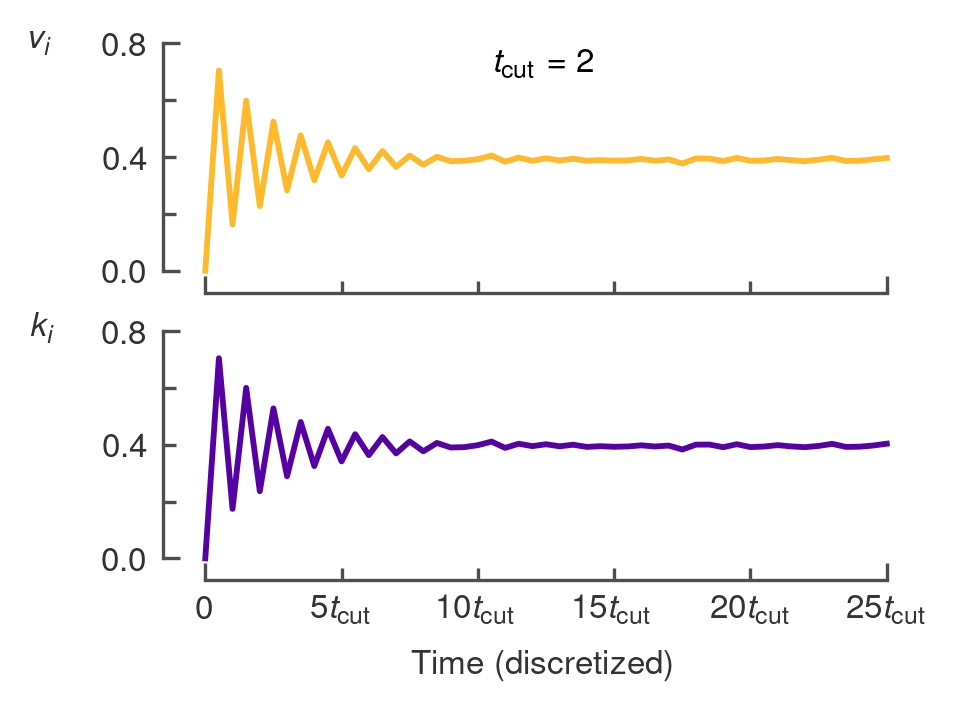

In [23]:
import matplotlib.pyplot as plt
plt.style.use('figure.mplstyle')

mm = 1/25.4  # Convert inches to mm
outward = 2  # Positioning axes outward
ratio = 3  # Plot aspect reatio 
color_text = (0, 0, 0, 0.8)  

col = plt.cm.plasma([0.85, 0.15])  # Plot line colors

y_max = 0.04

fig, ax = plt.subplots(2, 1, constrained_layout=True, figsize=[(86)*mm, 86*mm/1.5], sharex='col') 

ax[0].plot(np.arange(25*time_cutoff_range+1), np.hstack((0, virt_nbhd_size_mean_inf_honeycomb_conv_oscil)), color=col[0], zorder = -0)
ax[0].fill_between(np.arange(25*time_cutoff_range+1), np.hstack(([0], virt_nbhd_size_mean_inf_honeycomb_conv_oscil))-np.hstack(([0], virt_nbhd_size_std_error_inf_honeycomb_conv_oscil)), np.hstack(([0], virt_nbhd_size_mean_inf_honeycomb_conv_oscil))+np.hstack(([0], virt_nbhd_size_std_error_inf_honeycomb_conv_oscil)), color=col[0], linewidth = 0, alpha=0.4, zorder=-0-4)

ax[1].plot(np.arange(25*time_cutoff_range+1), np.hstack((0, virt_node_deg_mean_inf_honeycomb_conv_oscil)), color=col[1], zorder = -0)
ax[1].fill_between(np.arange(25*time_cutoff_range+1), np.hstack(([0], virt_node_deg_mean_inf_honeycomb_conv_oscil))-np.hstack(([0], virt_node_deg_std_error_inf_honeycomb_conv_oscil)), np.hstack(([0], virt_node_deg_mean_inf_honeycomb_conv_oscil))+np.hstack(([0], virt_node_deg_std_error_inf_honeycomb_conv_oscil)), color=col[0], linewidth = 0, alpha=0.4, zorder=-0-4)

ax[0].set_aspect(25*time_cutoff_range/(0.8*ratio))
ax[0].set_ylim([0-0.06*0.8, 0.8+0.06*0.8])
ax[0].spines['left'].set_position(('outward', outward))
ax[0].spines['left'].set_bounds(0, 0.8)
ax[0].set_yticks(ticks=[0, 0.8])
ax[0].set_yticks(ticks=[0.2, 0.4, 0.6], minor=True)
ax[0].set_yticklabels(labels=[{}, 0.4, {}], minor=True, ha='right')

ax[1].set_aspect(25*time_cutoff_range/(0.8*ratio))
ax[1].set_ylim([0-0.06*0.8, 0.8+0.06*0.8])
ax[1].spines['left'].set_position(('outward', outward))
ax[1].spines['left'].set_bounds(0, 0.8)
ax[1].set_yticks(ticks=[0, 0.8])
ax[1].set_yticks(ticks=[0.2, 0.4, 0.6], minor=True)
ax[1].set_yticklabels(labels=[{}, 0.4, {}], minor=True, ha='right')

for i in range(2):
    ax[i].spines['bottom'].set_position(('outward', outward))
    ax[i].spines['bottom'].set_bounds(0, 25*time_cutoff_range)
    ax[i].set_xticks(ticks=[0, 25*time_cutoff_range], minor=False)
    ax[i].set_xticklabels(labels=[0, '$25t_{\mathrm{cut}}$'], minor=False)
    ax[i].set_xticks(ticks=[5*time_cutoff_range, 10*time_cutoff_range, 15*time_cutoff_range, 20*time_cutoff_range], minor=True)
    ax[i].set_xticklabels(labels=['5$t_{\mathrm{cut}}$', '$10t_{\mathrm{cut}}$', '$15t_{\mathrm{cut}}$', '$20t_{\mathrm{cut}}$'], minor=True)
    
fig.supxlabel(r'Time (discretized)', color=color_text, ha='center', fontsize=8, x=0.52)

ax[0].set_ylabel(r'$ v_i$', rotation=0, y=0.9, labelpad = 12, ha='right')
ax[1].set_ylabel(r'$ k_i$', rotation=0, y=0.9, labelpad = 12, ha='right')
ax[0].text(25, 0.7, r'$t_{\mathrm{cut}}=2$', ha='center')

## 5. The same performance metrics for all nodes

In infinite networks, all nodes have equivalent performance metrics, so, generally, we use the node at index $[0, 0]$ to present the performance metrics. We verify below that there is little difference in the metrics of all nodes (index by $[i, j]$) in an $7\times 7$ square grid lattice (with periodic boundary conditions = infinite) compared to the node indexed at $[0, 0]$ with a fixed set of simulation parameters ($p_{\mathrm{gen}}, p_{\mathrm{succ}}=1$, $M=3$, $t_{\mathrm{cut}}=10$ and $q=0.1$).

In [24]:
data_inf_sq_comp = np.load('data/data_inf_sq_comp.npy')
# data_inf_sq_comp = np.reshape(data_inf_sq_comp, (len(time_cutoff_range), len(prob_swap_range), 8))

virt_nbhd_size_mean_inf_sq_comp = data_inf_sq_comp[0, :, :]
virt_nbhd_size_std_error_inf_sq_comp = data_inf_sq_comp[1, :, :]

virt_node_deg_mean_inf_sq_comp = data_inf_sq_comp[2, :, :]
virt_node_deg_std_error_inf_sq_comp = data_inf_sq_comp[3, :, :]

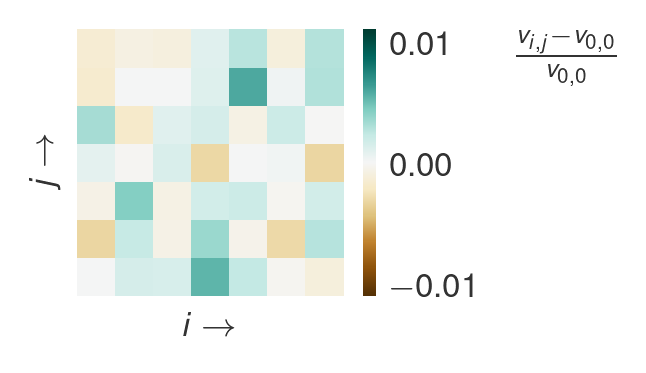

In [25]:
import matplotlib.pyplot as plt
plt.style.use('figure.mplstyle')
mm = 1/25.4  # Convert inches to mm
color_text = (0, 0, 0, 0.8)  

fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=[(86)*mm/1.5, 86*mm/3], sharex='col') 
ax.spines[['bottom', 'right', 'top', 'left']].set_visible(False)
ax.set_yticks([])
ax.set_xticks([])
ax.set_aspect(1)
ax.set_xlabel(r'$i\rightarrow$')
ax.set_ylabel(r'$j\rightarrow$')

c = ax.pcolor((virt_nbhd_size_mean_inf_sq_comp - virt_nbhd_size_mean_inf_sq_comp[0, 0])/virt_nbhd_size_mean_inf_sq_comp[0, 0], cmap='BrBG', vmin=-0.011, vmax=0.011)
cbar = fig.colorbar(c, ax=ax, drawedges=False, ticks = [-0.01, 0, 0.01])
cbar.outline.set_visible(False)
cbar.ax.tick_params(direction='in', size=0)
cbar.set_label(r'$\frac{v_{i, j}-v_{0, 0}}{v_{0, 0}}$', labelpad=8, rotation=0, ha='left', y=1.01, color=color_text)

In [26]:
print('Mean normalized virtual neigbhorhood size difference between all nodes node and the node indexed indexed at [0, 0]:', np.mean((virt_nbhd_size_mean_inf_sq_comp - virt_nbhd_size_mean_inf_sq_comp[0, 0])/virt_nbhd_size_mean_inf_sq_comp[0, 0]))
print('Maximum normalized virtual neigbhorhood size difference between all nodes node and the node indexed indexed at [0, 0]:', np.amax(np.abs((virt_nbhd_size_mean_inf_sq_comp - virt_nbhd_size_mean_inf_sq_comp[0, 0])/virt_nbhd_size_mean_inf_sq_comp[0, 0])))

Mean normalized virtual neigbhorhood size difference between all nodes node and the node indexed indexed at [0, 0]: 0.0006065483610404032
Maximum normalized virtual neigbhorhood size difference between all nodes node and the node indexed indexed at [0, 0]: 0.005845345417731362


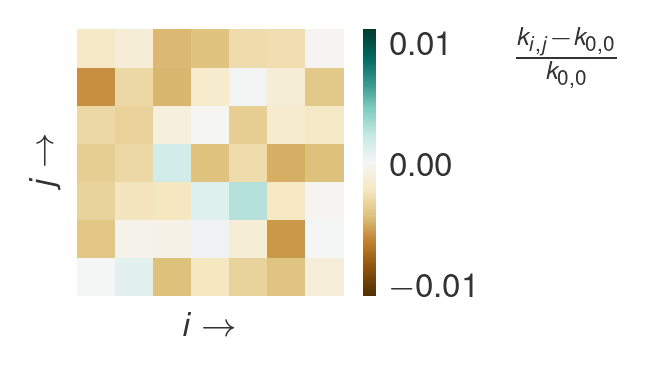

In [27]:
import matplotlib.pyplot as plt
plt.style.use('figure.mplstyle')
mm = 1/25.4  # Convert inches to mm
color_text = (0, 0, 0, 0.8)  

fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=[(86)*mm/1.5, 86*mm/3], sharex='col') 
ax.spines[['bottom', 'right', 'top', 'left']].set_visible(False)
ax.set_yticks([])
ax.set_xticks([])
ax.set_aspect(1)
ax.set_xlabel(r'$i\rightarrow$')
ax.set_ylabel(r'$j\rightarrow$')

c = ax.pcolor((virt_node_deg_mean_inf_sq_comp - virt_node_deg_mean_inf_sq_comp[0, 0])/virt_node_deg_mean_inf_sq_comp[0, 0], cmap='BrBG', vmin=-0.011, vmax=0.011)
cbar = fig.colorbar(c, ax=ax, drawedges=False, ticks = [-0.01, 0, 0.01])
cbar.outline.set_visible(False)
cbar.ax.tick_params(direction='in', size=0)
cbar.set_label(r'$\frac{k_{i, j}-k_{0, 0}}{k_{0, 0}}$', labelpad=8, rotation=0, ha='left', y=1.01, color=color_text)

In [28]:
np.mean((virt_node_deg_mean_inf_sq_comp - virt_node_deg_mean_inf_sq_comp[0, 0])/virt_node_deg_mean_inf_sq_comp[0, 0])
print('Mean normalized virtual neigbhorhood size difference between all nodes node and the node indexed indexed at [0, 0]:', np.mean((virt_node_deg_mean_inf_sq_comp - virt_node_deg_mean_inf_sq_comp[0, 0])/virt_node_deg_mean_inf_sq_comp[0, 0]))
print('Maximum normalized virtual neigbhorhood size difference between all nodes node and the node indexed indexed at [0, 0]:', np.amax(np.abs((virt_node_deg_mean_inf_sq_comp - virt_node_deg_mean_inf_sq_comp[0, 0])/virt_node_deg_mean_inf_sq_comp[0, 0])))

Mean normalized virtual neigbhorhood size difference between all nodes node and the node indexed indexed at [0, 0]: -0.002235002182108518
Maximum normalized virtual neigbhorhood size difference between all nodes node and the node indexed indexed at [0, 0]: 0.006047516198704175


## 6. Reproducibility of data

To ensure we can reproduce data, we set the random number generator seed to 0 during our simulations. To check if this indeed produces equivalent data, we run a reproducibility test, i.e., compare two datasets that have been generated separately (using the same random seed):

In [30]:
prob_swap_sweep_size = 101
prob_swap_range = np.arange(1, prob_swap_sweep_size)/(prob_swap_sweep_size-1)

max_swap_dist_range = [3, 1, 0]
time_cutoff = 11

data_inf_chain_max_swap_dist_rep_test = np.load('data/data_inf_chain_max_swap_dist_reproducibility_test.npy')
data_inf_chain_max_swap_dist_rep_test = np.reshape(data_inf_chain_max_swap_dist_rep_test, (len(max_swap_dist_range), len(prob_swap_range), 8))

virt_nbhd_size_mean_inf_chain_max_swap_dist_rep_test = data_inf_chain_max_swap_dist_rep_test[:, :, 0]
virt_nbhd_size_std_error_inf_chain_max_swap_dist_rep_test = data_inf_chain_max_swap_dist_rep_test[:, :, 1]
virt_nbhd_size_error_inf_chain_max_swap_dist_rep_test = data_inf_chain_max_swap_dist_rep_test[:, :, 2]
virt_nbhd_size_max_diff_inf_chain_max_swap_dist_rep_test = data_inf_chain_max_swap_dist_rep_test[:, :, 3]

virt_node_deg_mean_inf_chain_max_swap_dist_rep_test = data_inf_chain_max_swap_dist_rep_test[:, :, 4]
virt_node_deg_std_error_inf_chain_max_swap_dist_rep_test = data_inf_chain_max_swap_dist_rep_test[:, :, 5]
virt_node_deg_error_inf_chain_max_swap_dist_rep_test = data_inf_chain_max_swap_dist_rep_test[:, :, 6]
virt_node_deg_max_diff_inf_chain_max_swap_dist_rep_test = data_inf_chain_max_swap_dist_rep_test[:, :, 7]

In [31]:
np.testing.assert_array_equal(virt_nbhd_size_mean_inf_chain_max_swap_dist, virt_nbhd_size_mean_inf_chain_max_swap_dist_rep_test)
np.testing.assert_array_equal(virt_nbhd_size_std_error_inf_chain_max_swap_dist, virt_nbhd_size_std_error_inf_chain_max_swap_dist_rep_test)
np.testing.assert_array_equal(virt_nbhd_size_error_inf_chain_max_swap_dist, virt_nbhd_size_error_inf_chain_max_swap_dist_rep_test)
np.testing.assert_array_equal(virt_nbhd_size_max_diff_inf_chain_max_swap_dist, virt_nbhd_size_max_diff_inf_chain_max_swap_dist_rep_test)
np.testing.assert_array_equal(virt_node_deg_mean_inf_chain_max_swap_dist, virt_node_deg_mean_inf_chain_max_swap_dist_rep_test)
np.testing.assert_array_equal(virt_node_deg_std_error_inf_chain_max_swap_dist, virt_node_deg_std_error_inf_chain_max_swap_dist_rep_test)
np.testing.assert_array_equal(virt_node_deg_error_inf_chain_max_swap_dist, virt_node_deg_error_inf_chain_max_swap_dist_rep_test)
np.testing.assert_array_equal(virt_node_deg_max_diff_inf_chain_max_swap_dist, virt_node_deg_max_diff_inf_chain_max_swap_dist_rep_test)